# Hackathon Group 22

## Imports

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

## Datasets Exploration

### Retail DataFrame Overview

Dataframe overviewing the traffic website.

3 kinds of event: Order, Add to Basket, Product Page.

Only Order has Values for the Quantity and Sales columns. Otherwise, the customer did not buy the product.

#### Data Cleaning and first exploration

In [31]:
df_retail = pd.read_csv('/home/arizona/code/ESCP/hackathon/hackathon_mbd/data/retailer.csv')
df_retail['timestamp_utc'] = pd.to_datetime(df_retail['timestamp_utc'])
df_retail.head(3)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN


In [33]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866049 entries, 0 to 9866048
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   customer_id    object        
 1   timestamp_utc  datetime64[ns]
 2   event_name     object        
 3   brand          object        
 4   product_name   object        
 5   sales          float64       
 6   quantity       float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 526.9+ MB


Checking for null values for event_name == Order

In [ ]:
print(f"There is {sum(df_retail[df_retail['event_name']=='Order']['sales'].isna())} NaN values in the sale column for Orders")
print(f"There is {sum(df_retail[df_retail['event_name']=='Order']['quantity'].isna())} NaN values in the quantity column for Orders")
print(f"There is {sum(df_retail[df_retail['event_name']=='Order']['brand'].isna())} NaN values in the brand column for Orders")
print(f"There is {sum(df_retail[df_retail['event_name']=='Order']['product_name'].isna())} NaN values in the product_name column for Orders")

There is 0 NaN values in the sale column for Orders
There is 0 NaN values in the quantity column for Orders
There is 8776 NaN values in the brand column for Orders
There is 8776 NaN values in the product_name column for Orders


Visibly we have the same number of NaN values for both brand and product_name column. Let's investigate.

In [ ]:
df_retail_order = df_retail[df_retail['event_name']=='Order']
df_retail_missing = df_retail_order[df_retail_order.isnull().any(axis=1)]
df_retail_missing.head(3)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
863,reczbO5sThS4rw0JdJ,2024-01-05 21:38:18,Order,NaN,NaN,78.99,1.0
885,reSFq86EE91VCfBImt,2024-03-15 03:35:17,Order,NaN,NaN,101.55,1.0
1575,reOseksZcmsUreRQbs,2024-03-15 02:40:17,Order,NaN,NaN,101.55,1.0


Not much information.. There doesn't seem to have an obvious reason for those transacation not having brand or product name.. But let's keep them for now as it is still an order that counts. ***If needed we can remove them, especially if we focus on brand/product name***

#### Proportion of the different columns

In [ ]:
df_retail['event_name'].value_counts(normalize=True)

,proportion
event_name,
Product Page View,0.646320
Add to cart,0.207795
Order,0.145885


In [ ]:
df_retail['brand'].value_counts(normalize=True)

,proportion
brand,
Science Diet,0.819553
Prescription Diet,0.130102
Hills,0.050345


In [ ]:
df_retail['product_name'].value_counts(normalize=True)

,proportion
product_name,
SD Ca Adt SmPws Ckn 4.5lb bg,2.305219e-02
SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,1.956145e-02
SD Ca Adt SenSt&Sk Ckn 30lb bg,1.933848e-02
SD Ca A7+ SB Ckn 5lb bg,1.668998e-02
SD Pup SmPws Ckn 4.5lb bg,1.665535e-02
...,...
SD Fel Adt HBC OFEnt 24x5.5oz cs,8.343059e-07
SD Ktn 12x2.9oz VarPk,8.343059e-07
SD Fel Adt SavSalEnt 24x2.9oz cs,7.300177e-07


#### Unknown Investigation

In [ ]:
df_retail_unknown = df_retail[df_retail['customer_id'] == 'unknown']
df_retail_unknown.head(3)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
201,unknown,2024-04-13 00:44:59,Product Page View,NaN,NaN,NaN,NaN
202,unknown,2024-04-13 00:46:22,Product Page View,NaN,NaN,NaN,NaN
203,unknown,2024-04-13 00:53:12,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN


In [ ]:
df_retail_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194530 entries, 201 to 9866032
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer_id    194530 non-null  object        
 1   timestamp_utc  194530 non-null  datetime64[ns]
 2   event_name     194530 non-null  object        
 3   brand          189317 non-null  object        
 4   product_name   189317 non-null  object        
 5   sales          28423 non-null   float64       
 6   quantity       28423 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 11.9+ MB


In [ ]:
194530/9866049*100

1.9717112696277912

There is 194,530 Unknown customers. The entire DataFrame is 9,866,049 rows.

This represent roughly 2% of the Data.



In [ ]:
df_retail_unknown['event_name'].value_counts(normalize=True)

,proportion
event_name,
Product Page View,0.646301
Add to cart,0.207588
Order,0.146111


Weirdly, it has almost exactly the same proportion for the event_name columns as the proportion of the full dataset...

This would mean that removing them would not change the whole outcome of our analysis. At least for training models.

### Socio Demo DataFrame Overview

DataFrame that focuses on the socio-demographical infromation of the customers. It contains: Customer_id, breed, age, income.

#### Data Cleaning and First Exploration

In [ ]:
df_socio_demo = pd.read_csv('socio_demo.csv')
df_socio_demo.head(3)

,customer_id,breed,age,income
0,rezLh5Hae3m6flaxM4,Purebred,[25-35[,[120-200K$[
1,resWkHpEcL1IUfdoBp,Purebred,[25-35[,[80-120K$[
2,re9qxF7kS9R2LwOVVY,Purebred,[35-45[,[80-120K$[


In [ ]:
df_socio_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354584 entries, 0 to 1354583
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1354584 non-null  object
 1   breed        1354584 non-null  object
 2   age          1354584 non-null  object
 3   income       1354584 non-null  object
dtypes: object(4)
memory usage: 41.3+ MB


In [ ]:
df_socio_demo[df_socio_demo.isnull().any(axis=1)]

,customer_id,breed,age,income


#### Proportion of the different columns


In [ ]:
df_socio_demo['breed'].value_counts(normalize=True)

,proportion
breed,
Purebred,0.610532
Mixed-breed,0.389468


In [ ]:
df_socio_demo['age'].value_counts(normalize=True)

,proportion
age,
[65+[,0.189730
[25-35[,0.180822
[55-65[,0.174363
[45-55[,0.170258
[35-45[,0.150322
[18-25[,0.134505


In [ ]:
df_socio_demo['income'].value_counts(normalize=True)

,proportion
income,
[120-200K$[,0.219459
[200K$+[,0.209953
[40-80K$[,0.206490
[80-120K$[,0.206475
[0-40K$[,0.157623


#### Unknown Investigation

In [ ]:
df_socio_demo[df_socio_demo['customer_id']=='unknown']

,customer_id,breed,age,income
744396,unknown,Mixed-breed,[35-45[,[0-40K$[


That was unexpected... unknown is actually in the df_socio_demo..

It is either one person that has made more than 2% of the whole traffic website (df_retails) or, the technology they use to map the cookies to the traffic flow has actually created of potential profile for all the transaction in the df_retails. Which i found more accurate

### TV Publisher Dataframe Overview

DataFrame containing the device used to play an ad on (TV) the time, and its cost.

#### Data Cleaning and First Exploration

In [ ]:
df_tv_publisher = pd.read_csv('tv_publisher.csv')
df_tv_publisher['timestamp_utc'] = pd.to_datetime(df_tv_publisher['timestamp_utc'])
df_tv_publisher.head(3)

,device_id,timestamp_utc,cost_milli_cent
0,ctv81YlbBXho,2024-04-23 21:09:46,2325.51
1,ctvWr7bOO5Je,2024-04-19 18:31:30,2325.51
2,ctvktBqDUgcV,2024-05-07 23:32:37,2325.51


In [ ]:
df_tv_publisher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827133 entries, 0 to 5827132
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   device_id        object        
 1   timestamp_utc    datetime64[ns]
 2   cost_milli_cent  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 133.4+ MB


In [ ]:
df_tv_publisher.describe()

,timestamp_utc,cost_milli_cent
count,5827133,5.827133e+06
mean,2024-04-17 18:17:59.785963008,2.325511e+03
min,2024-02-29 21:00:57,2.325510e+03
25%,2024-03-23 02:31:58,2.325510e+03
50%,2024-04-08 15:31:50,2.325510e+03
75%,2024-05-11 05:58:23,2.325510e+03
max,2024-06-30 23:59:57,2.646510e+03
std,NaN,4.975550e-01


In [ ]:
df_tv_publisher[df_tv_publisher.isnull().any(axis=1)]

,device_id,timestamp_utc,cost_milli_cent


#### Unknown Investigation

In [ ]:
df_tv_publisher[df_tv_publisher['device_id']=='unknown']

,device_id,timestamp_utc,cost_milli_cent
139,unknown,2024-04-08 04:11:50,2325.51
140,unknown,2024-04-19 02:34:21,2325.51
141,unknown,2024-04-23 03:22:12,2325.51
142,unknown,2024-04-24 03:15:22,2325.51
143,unknown,2024-04-25 02:54:45,2325.51
...,...,...,...
5826660,unknown,2024-04-16 04:13:45,2325.51
5826749,unknown,2024-05-12 18:23:42,2325.51
5826878,unknown,2024-05-04 15:53:56,2325.51
5826879,unknown,2024-05-04 16:25:33,2325.51


In [ ]:
173206/5827133*100

2.9724051261572373

Again a small proportion (3%) of the DataFrame is labelled as 'Unknown'.

### Programmatic Publisher DataFrame Overview

In [ ]:
programmatic_publisher = pd.read_csv('programmatic_publisher.csv')
programmatic_publisher['timestamp_utc'] = pd.to_datetime(programmatic_publisher['timestamp_utc'])
programmatic_publisher.head(3)

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent
0,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,2024-02-06 04:10:41,Contextual,Phone,283.496
1,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,2024-02-26 23:49:23,Retargeting,PC,1884.537
2,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,2024-06-16 20:55:27,Contextual,TV,601.930


In [ ]:
programmatic_publisher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17493428 entries, 0 to 17493427
Data columns (total 5 columns):
 #   Column           Dtype         
---  ------           -----         
 0   dsp_id           object        
 1   timestamp_utc    datetime64[ns]
 2   campaign_name    object        
 3   device_type      object        
 4   cost_milli_cent  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 667.3+ MB


In [ ]:
programmatic_publisher.describe()

,timestamp_utc,cost_milli_cent
count,17493428,1.749343e+07
mean,2024-03-15 23:03:10.769140736,5.314746e+02
min,2024-01-01 00:00:04,1.083310e+02
25%,2024-01-24 20:27:57.750000128,1.466100e+02
50%,2024-03-07 05:15:49,2.519380e+02
75%,2024-05-03 05:34:40.249999872,5.447530e+02
max,2024-06-30 23:59:59,1.133500e+04
std,NaN,7.282323e+02


In [ ]:
programmatic_publisher[programmatic_publisher.isnull().any(axis=1)]

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent


#### Proportion for Different Columns

In [ ]:
programmatic_publisher['device_type'].value_counts()

,count
device_type,
PC,10216038
Phone,5928879
TV,1347813
Unknown,686
Robot,12


In [ ]:
programmatic_publisher['campaign_name'].value_counts(normalize=True)

,proportion
campaign_name,
Contextual,0.7785
Retargeting,0.2215


#### Unknown Investigation

In [ ]:
programmatic_publisher[programmatic_publisher['dsp_id']=='unknown']

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent
34,unknown,2024-03-02 18:51:43,Retargeting,PC,3723.196
72,unknown,2024-03-30 16:42:03,Retargeting,PC,1602.259
154,unknown,2024-01-03 17:36:20,Contextual,TV,537.129
155,unknown,2024-01-04 21:00:01,Contextual,TV,544.449
156,unknown,2024-01-05 23:43:44,Contextual,TV,1951.856
...,...,...,...,...,...
17493402,unknown,2024-03-27 21:07:35,Retargeting,TV,125.837
17493403,unknown,2024-03-27 22:50:42,Retargeting,TV,124.645
17493425,unknown,2024-04-16 02:21:41,Retargeting,TV,128.794
17493426,unknown,2024-04-16 02:38:15,Retargeting,TV,130.560


In [ ]:
1907730/17493428*100

10.905409734444273

Here the Proportion of Unknown values is way higher.. roughly 11%, which is almost 5 times as more than the other dataframe.

Let's try to understand what it represent in terms of cost.

In [ ]:
total_unknown_cost = programmatic_publisher[programmatic_publisher['dsp_id']=='unknown']['cost_milli_cent'].sum()
total_known_cost = programmatic_publisher[programmatic_publisher['dsp_id']!='unknown']['cost_milli_cent'].sum()
total_unknown_cost/total_known_cost*100

12.250736212977813

It seems to match pretty much the proportion.. If we decide to remove all unknown, the would represent an error of 12% for the Programmatic Publisher Cost.

### Mapping Transaction Publisher TV DataFrame Overview

#### Data Cleaning and First Exploration

In [ ]:
mapping_transac_publisher_tv = pd.read_csv('mapping_transac_publisher_tv.csv')
mapping_transac_publisher_tv.head(3)

,customer_id,dsp_id,device_id
0,reFs5GI87lXJkJSi9r,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,ctv81YlbBXho
1,reTjziox2cSrxVq70Y,dspCSu1n1mhys37Na5OXMaKaE8P8CS,ctvHmkxqZXBg
2,reOrpt9vhSwhbPVtni,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,ctvwp5n34myx


In [ ]:
mapping_transac_publisher_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984411 entries, 0 to 7984410
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   customer_id  object
 1   dsp_id       object
 2   device_id    object
dtypes: object(3)
memory usage: 182.7+ MB


In [ ]:
print(f"There is {len(mapping_transac_publisher_tv) - mapping_transac_publisher_tv['customer_id'].nunique()} duplicated values in customer_id ({round((mapping_transac_publisher_tv['customer_id'].nunique() / len(mapping_transac_publisher_tv)), 2 * 100)}%)")
print(f"There is {len(mapping_transac_publisher_tv) - mapping_transac_publisher_tv['dsp_id'].nunique()} duplicated values in dsp_id ({round((mapping_transac_publisher_tv['dsp_id'].nunique() / len(mapping_transac_publisher_tv)), 2 * 100)})%")
print(f"There is {len(mapping_transac_publisher_tv) - mapping_transac_publisher_tv['device_id'].nunique()} duplicated values in device_id ({round((mapping_transac_publisher_tv['device_id'].nunique() / len(mapping_transac_publisher_tv)), 2 * 100)})%")

There is 158700 duplicated values in customer_id (0.9801237686787416%)
There is 869310 duplicated values in dsp_id (0.8911240916831561)%
There is 391322 duplicated values in device_id (0.9509892464203058)%


These duplicates are surely due to the unknown id.. let's check in the next section.

#### Unknown Investigation

In [ ]:
print(f"Number of unknown in customer_id: {len(mapping_transac_publisher_tv[mapping_transac_publisher_tv['customer_id']=='unknown']['customer_id'])}")
print(f"Number of unknown in dsp_id: {len(mapping_transac_publisher_tv[mapping_transac_publisher_tv['dsp_id']=='unknown']['dsp_id'])}")
print(f"Number of unknown in device_id: {len(mapping_transac_publisher_tv[mapping_transac_publisher_tv['device_id']=='unknown']['device_id'])}")

Number of unknown in customer_id: 158701
Number of unknown in dsp_id: 869311
Number of unknown in device_id: 232622


Everything seems to fit except for the device_id column, let's investigate this column

In [ ]:
mapping_transac_publisher_tv.groupby('device_id')['device_id'].count().reset_index(name='count_unk').sort_values(by='count_unk', ascending=False).head(3)

,device_id,count_unk
7593088,unknown,232622
5062069,ctvfK4XJCFL9,1
5062067,ctvfK4TSbGuN,1


In [ ]:
sum(mapping_transac_publisher_tv['device_id'].isna()) + 232622 + 7593088 == len(mapping_transac_publisher_tv)

True

Here the addition of: The number of NaN's, the number of Unknown in device_id and the number of non duplicated have been added to verify it is equal to the total lenght of the mapping dataframe. It is the case. Meaning there is only: unique values, NaN's, or Unknown.

Here are the proportion:

In [ ]:
print(f"Proportion of NaN's Values: {round(sum(mapping_transac_publisher_tv['device_id'].isna()) / len(mapping_transac_publisher_tv) *100, 2)} %")
print(f"Proportion of Unique Values: {round(7593088 / len(mapping_transac_publisher_tv) *100, 2)} %")
print(f"Proportion of Unknown Values: {round(232622 / len(mapping_transac_publisher_tv) *100, 2)} %")

Proportion of NaN's Values: 1.99 %
Proportion of Unique Values: 95.1 %
Proportion of Unknown Values: 2.91 %


## Merging the whole data into one dataframe

#### Merging first without the Unknown (df_retail base df)

Let's try without the unknown first, then we will do a merge solely on unknown.

First let's create a pivot table to get a better vision of each event name.

In [ ]:
df_retail_event_details = df_retail[df_retail['customer_id']!='unknown'].groupby(['customer_id', 'event_name'])['event_name'].count().reset_index(name='count_event')
df_retail_pivot_wo_unk = df_retail_event_details.pivot_table(index='customer_id', columns='event_name', values='count_event', fill_value=0).reset_index()
df_retail_pivot_wo_unk.head(3)

event_name,customer_id,Add to cart,Order,Product Page View
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0
2,re000fIO9QXTWYjOfn,8.0,8.0,7.0


In [ ]:
df_retail_extra = df_retail[df_retail['customer_id']!='unknown'].groupby('customer_id').agg({
    'product_name': lambda x: Counter(x.dropna()).most_common(1)[0][0] if len(x.dropna()) > 0 else None,
    'timestamp_utc': lambda x: min(x),
    'sales': 'sum',
    'brand': lambda x: Counter(x.dropna()).most_common(1)[0][0] if len(x.dropna()) > 0 else None,
    'quantity': 'sum'
}).reset_index()

In [ ]:
df_retail_extra

,customer_id,product_name,timestamp_utc,sales,brand,quantity
0,re0007V8sqIHsZnbvC,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0
1,re000JYhnKbTkPqMB4,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0
2,re000fIO9QXTWYjOfn,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0
3,re000kbtVVzPwZcEr4,SD Ca Adt SenSt&Sk Ckn 30lb bg,2024-03-06 23:57:04,0.00,Science Diet,0.0
4,re000pHbVOysCXRHgt,SD Ca Adt Lt Ckn 30lb bg,2024-01-01 18:12:21,394.94,Science Diet,5.0
...,...,...,...,...,...,...
1354578,rezzz8a320jhOvmL3A,SD Ca A6+ LB Ckn 15lb bg,2024-04-26 23:11:28,0.00,Science Diet,0.0
1354579,rezzzYRiwreLF23ot3,SD Ca Adt PerWgt Ckn SB 4lb bg,2024-06-04 23:56:40,0.00,Science Diet,0.0
1354580,rezzzZvkIaiWNQ1AmV,PD m/d Feline 8.5lb bg,2024-04-16 22:01:01,0.00,Prescription Diet,0.0
1354581,rezzzipns16pTCb4OS,SD Ca Adt Lt SB Ckn 5lb bg,2024-04-18 01:32:56,66.98,Science Diet,2.0


In [ ]:
df_retail_pivot_wo_unk = df_retail_pivot_wo_unk.merge(df_retail_extra, how='left', on='customer_id')

In [ ]:
df_retail_pivot_wo_unk[df_retail_pivot_wo_unk['brand_y']=='Hills']

,customer_id,Add to cart,Order,Product Page View,product_name_x,timestamp_utc_x,sales_x,brand_x,quantity_x,product_name_y,timestamp_utc_y,sales_y,brand_y,quantity_y
13,re003crViui7MmOapY,2.0,2.0,1.0,HI Ca Nat BkdLtBisc Sm w/Ckn 12x8oz cs,2024-01-05 16:48:31,15.62,Hills,2.0,HI Ca Nat BkdLtBisc Sm w/Ckn 12x8oz cs,2024-01-05 16:48:31,15.62,Hills,2.0
15,re003pI9bjyJX0uX4I,1.0,0.0,1.0,HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs,2024-06-06 21:38:28,0.00,Hills,0.0,HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs,2024-06-06 21:38:28,0.00,Hills,0.0
17,re004P1fZfs9NXKVPL,0.0,0.0,1.0,HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs,2024-03-04 22:49:57,0.00,Hills,0.0,HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs,2024-03-04 22:49:57,0.00,Hills,0.0
34,re007YLIkh1xBxj9FK,14.0,16.0,48.0,HI Ca GF SBkNat Ckn&Car 12x8oz cs,2024-02-05 00:03:37,147.99,Hills,16.0,HI Ca GF SBkNat Ckn&Car 12x8oz cs,2024-02-05 00:03:37,147.99,Hills,16.0
84,re00HMRkq9TkWqSeb4,6.0,6.0,2.0,HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs,2024-01-20 19:08:46,89.63,Hills,7.0,HI Ca Nat SSav T PnBut&Ban 12x8.0oz cs,2024-01-20 19:08:46,89.63,Hills,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354511,rezzoLVD7Bu7sX6pmh,6.0,5.0,27.0,HI Ca NatJkySt Mini Bf 12x7.1oz cs,2024-01-21 23:21:45,132.30,Hills,15.0,HI Ca NatJkySt Mini Bf 12x7.1oz cs,2024-01-21 23:21:45,132.30,Hills,15.0
1354527,rezzrjoxk405XgsvEY,2.0,2.0,0.0,HI Ca GF SBkNat Bf&SwtPot 12x8oz cs,2024-06-08 18:47:06,15.56,Hills,2.0,HI Ca GF SBkNat Bf&SwtPot 12x8oz cs,2024-06-08 18:47:06,15.56,Hills,2.0
1354534,rezzsR3GRndlCjweZk,9.0,8.0,10.0,HI Ca Nat FlxStxT Bf 12x7.1oz cs,2024-05-04 16:09:43,124.57,Hills,16.0,HI Ca Nat FlxStxT Bf 12x7.1oz cs,2024-05-04 16:09:43,124.57,Hills,16.0
1354543,rezztqaQthZfoG7kms,3.0,3.0,6.0,HI Ca Nat BkdLtBisc Sm w/Ckn 12x8oz cs,2024-01-16 09:24:51,23.40,Hills,3.0,HI Ca Nat BkdLtBisc Sm w/Ckn 12x8oz cs,2024-01-16 09:24:51,23.40,Hills,3.0


Checking if there is the same number of rows, as there is unique customer id

In [ ]:
df_retail_pivot_wo_unk['customer_id'].nunique() == len(df_retail_pivot_wo_unk)

True

Adding now a new column 'total_website_interaction'

In [ ]:
df_retail_pivot_wo_unk['total_website_interaction'] = df_retail_pivot_wo_unk['Add to cart'] + df_retail_pivot_wo_unk['Order'] + df_retail_pivot_wo_unk['Product Page View']
df_retail_pivot_wo_unk.head(3)

,customer_id,Add to cart,Order,Product Page View,product_name_x,timestamp_utc_x,sales_x,brand_x,quantity_x,product_name_y,timestamp_utc_y,sales_y,brand_y,quantity_y,total_website_interaction
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0,2.0
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0,3.0
2,re000fIO9QXTWYjOfn,8.0,8.0,7.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0,23.0


Let's now add the customers socio geogrphical data.

In [ ]:
df_retail_socio_wo_unk = df_retail_pivot_wo_unk.merge(df_socio_demo, how='left', on='customer_id')
df_retail_socio_wo_unk.head(3)

,customer_id,Add to cart,Order,Product Page View,product_name_x,timestamp_utc_x,sales_x,brand_x,quantity_x,product_name_y,timestamp_utc_y,sales_y,brand_y,quantity_y,total_website_interaction,breed,age,income
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0,2.0,Purebred,[25-35[,[120-200K$[
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0,3.0,Mixed-breed,[18-25[,[120-200K$[
2,re000fIO9QXTWYjOfn,8.0,8.0,7.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0,23.0,Purebred,[45-55[,[40-80K$[


Now we have a retail dataset containing additional information on the customers

Let's now try to add the mapping data in order to get the different ids related to a specific customer

In [ ]:
#df_retail_socio_map_wo_unk = df_retail_socio_wo_unk.merge(mapping_transac_publisher_tv, how='left', on='customer_id')
#df_retail_socio_map_wo_unk

,customer_id,Add to cart,Order,Product Page View,total_website_interaction,breed,age,income,dsp_id,device_id
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0,2.0,Purebred,[25-35[,[120-200K$[,dspt0ZXO5jvJTrabhKeLXZLiR2PbyQ,ctvkPZxmFRUl
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0,3.0,Mixed-breed,[18-25[,[120-200K$[,dsp6V6xOiPqoLgsv5GteFjwomGj2OE,ctv9vXQKdLuu
2,re000fIO9QXTWYjOfn,8.0,8.0,7.0,23.0,Purebred,[45-55[,[40-80K$[,dspIYJLpU5Ex3KiyA1K3wn7VNexZWB,ctvQEmtlTLvO
3,re000kbtVVzPwZcEr4,0.0,0.0,19.0,19.0,Purebred,[65+[,[200K$+[,dspJHqHlhc1SVwiHlbqjWofC0ReNwz,ctvE4b5vBWGQ
4,re000pHbVOysCXRHgt,5.0,5.0,7.0,17.0,Purebred,[18-25[,[120-200K$[,dspT2j7lTjKShSz4PDIlj3FcfXwIiS,ctvcfz2eP4fV
...,...,...,...,...,...,...,...,...,...,...
1354578,rezzz8a320jhOvmL3A,0.0,0.0,2.0,2.0,Mixed-breed,[35-45[,[80-120K$[,dspcRI6KFVdRU2K9XgArgerMN3NhKB,ctvNHXF7ePVj
1354579,rezzzYRiwreLF23ot3,0.0,0.0,1.0,1.0,Mixed-breed,[18-25[,[0-40K$[,unknown,ctvJGH8s82Fv
1354580,rezzzZvkIaiWNQ1AmV,0.0,0.0,1.0,1.0,Purebred,[25-35[,[80-120K$[,dspgVESJvONVmEFZPusBo1IvZ3d9pU,ctv7L6JydzSE
1354581,rezzzipns16pTCb4OS,2.0,2.0,1.0,5.0,Mixed-breed,[35-45[,[80-120K$[,dspuCywFbMu4BIENswJXXXcUOZ0luV,ctvoPF1pHlS7


We now have a DataFrame containing both information on customers, and the different IDs associated to that particular customer.

Moving on now to the Programmatic Publisher Data. However, before moving on, we need to adjust the dataframe for computing power. A lot of customer_id present in the Programmatic Publisher are not found in the retail DataFrame. This can be explained by the fact that not everyone who sees advertising go on the retailer website.

Before coninuing to merge. Let's see how many Programmatic Publisher transaction have customer_id in common from the dataframe we did before (df_retail + df_socio_geo + mapping (wo unknown))

To do that, we need to merge Mapping and Programmatic in order to obtiain the customer_id linked to a transaction in Programmatic. Then we will compare the number of customer_id that has a programmatic transaction.

In [ ]:
customer_retail_list = df_retail_socio_wo_unk['customer_id'].to_list()
customer_map_prog_list = mapping_transac_publisher_tv[mapping_transac_publisher_tv['dsp_id']!='unknown'].merge(programmatic_publisher, how='left', on='dsp_id')['customer_id'].to_list()

In [ ]:
len(set(customer_retail_list))

1354583

In [ ]:
len(set(customer_map_prog_list))

6973891

In [ ]:
common = set(customer_retail_list) & set(customer_map_prog_list)
len(common)

1207350

In [ ]:
all_transac = len(customer_map_prog_list)
all_transac

17599774

In [ ]:
nb_transac_customer = sum(pd.Series(customer_map_prog_list).isin(common))
nb_transac_customer

4178232

Small Statistical point on what has been discovered.

In [ ]:
print(f'The proportion of ads that were not attached by a customer of the retailer website {round((1-len(common)/len(set(customer_map_prog_list)))*100, 2)}%')
print(f'The proportion of ads that were not followed by a visit of the retailer website {round((1-nb_transac_customer/len(customer_map_prog_list))*100, 2)}%')

The proportion of ads that were not attached by a customer of the retailer website 82.69%
The proportion of ads that were not followed by a visit of the retailer website 76.26%


Let's now add the Programmatic Publisher data to our customer DataFrame.

In [ ]:
programmatic_publisher.head(3)

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent
0,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,2024-02-06 04:10:41,Contextual,Phone,283.496
1,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,2024-02-26 23:49:23,Retargeting,PC,1884.537
2,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,2024-06-16 20:55:27,Contextual,TV,601.930


In [ ]:
programmatic_w_cust_id = mapping_transac_publisher_tv[mapping_transac_publisher_tv['dsp_id']!='unknown'].merge(programmatic_publisher, how='left', on='dsp_id')

In [ ]:
programmatic_details_campain = programmatic_w_cust_id[programmatic_w_cust_id['customer_id']!='unknown'].groupby(['customer_id', 'campaign_name'])['campaign_name'].count().reset_index(name='campain_count')
programatic_campain = programmatic_details_campain.pivot_table(index='customer_id', columns='campaign_name', values='campain_count', fill_value=0).reset_index()
programatic_campain.head(3)

campaign_name,customer_id,Contextual,Retargeting
0,re0003BIjfgvMOXmfh,1.0,0.0
1,re000A5ftS1crvO4vW,0.0,1.0
2,re000BtJhv7zeg5jAh,1.0,0.0


In [ ]:
programmatic_details_device = programmatic_w_cust_id[programmatic_w_cust_id['customer_id']!='unknown'].groupby(['customer_id', 'device_type'])['device_type'].count().reset_index(name='device_count')
programatic_device = programmatic_details_device.pivot_table(index='customer_id', columns='device_type', values='device_count', fill_value=0).reset_index()
programatic_device.head(3)

device_type,customer_id,PC,Phone,Robot,TV,Unknown
0,re0003BIjfgvMOXmfh,1.0,0.0,0.0,0.0,0.0
1,re000A5ftS1crvO4vW,1.0,0.0,0.0,0.0,0.0
2,re000BtJhv7zeg5jAh,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_program_extra = programmatic_w_cust_id[programmatic_w_cust_id['customer_id']!='unknown'].groupby('customer_id').agg({
    'cost_milli_cent': 'sum',
    'timestamp_utc': lambda x: min(x)
}).reset_index()

In [ ]:
full_programmatic_detail = programatic_campain.merge(programatic_device, how='left', on='customer_id').merge(df_program_extra, how='left', on='customer_id')

In [ ]:
full_programmatic_detail

,customer_id,Contextual,Retargeting,PC,Phone,Robot,TV,Unknown,cost_milli_cent,timestamp_utc
0,re0003BIjfgvMOXmfh,1.0,0.0,1.0,0.0,0.0,0.0,0.0,146.750,2024-01-03 18:58:49
1,re000A5ftS1crvO4vW,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2728.290,2024-01-18 22:12:06
2,re000BtJhv7zeg5jAh,1.0,0.0,0.0,1.0,0.0,0.0,0.0,147.071,2024-01-05 20:18:40
3,re000ChB4g6FQco48O,1.0,0.0,0.0,0.0,0.0,1.0,0.0,153.500,2024-02-12 13:53:58
4,re000JLFUVT4zHZeg5,42.0,1.0,29.0,14.0,0.0,0.0,0.0,17375.798,2024-01-03 01:20:57
...,...,...,...,...,...,...,...,...,...,...
4999655,rezzziPVXXLJIMYeXI,1.0,0.0,0.0,1.0,0.0,0.0,0.0,334.789,2024-01-16 09:34:26
4999656,rezzzjryrM7TbEHdws,1.0,0.0,0.0,1.0,0.0,0.0,0.0,231.196,2024-04-01 15:23:05
4999657,rezzzk3fDGAIEZt4Iz,1.0,0.0,1.0,0.0,0.0,0.0,0.0,274.852,2024-04-14 11:07:35
4999658,rezzzqXlE0I0qrb6hI,3.0,0.0,0.0,3.0,0.0,0.0,0.0,467.941,2024-01-08 21:38:32


In [ ]:
customer_df_wo_unk = df_retail_socio_wo_unk.merge(full_programmatic_detail, how='left', on='customer_id')

In [ ]:
customer_df_wo_unk

,customer_id,Add to cart,Order,Product Page View,product_name_x,timestamp_utc_x,sales_x,brand_x,quantity_x,product_name_y,...,income,Contextual,Retargeting,PC,Phone,Robot,TV,Unknown,cost_milli_cent,timestamp_utc
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0,SD Fel Adt PerWgt Ckn 15lb bg,...,[120-200K$[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0,SD Ca Adt PerWgt Ckn 25lb bg,...,[120-200K$[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,re000fIO9QXTWYjOfn,8.0,8.0,7.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,...,[40-80K$[,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3595.156,2024-01-24 14:25:56
3,re000kbtVVzPwZcEr4,0.0,0.0,19.0,SD Ca Adt SenSt&Sk Ckn 30lb bg,2024-03-06 23:57:04,0.00,Science Diet,0.0,SD Ca Adt SenSt&Sk Ckn 30lb bg,...,[200K$+[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,re000pHbVOysCXRHgt,5.0,5.0,7.0,SD Ca Adt Lt Ckn 30lb bg,2024-01-01 18:12:21,394.94,Science Diet,5.0,SD Ca Adt Lt Ckn 30lb bg,...,[120-200K$[,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1863.549,2024-01-01 18:30:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354578,rezzz8a320jhOvmL3A,0.0,0.0,2.0,SD Ca A6+ LB Ckn 15lb bg,2024-04-26 23:11:28,0.00,Science Diet,0.0,SD Ca A6+ LB Ckn 15lb bg,...,[80-120K$[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1354579,rezzzYRiwreLF23ot3,0.0,0.0,1.0,SD Ca Adt PerWgt Ckn SB 4lb bg,2024-06-04 23:56:40,0.00,Science Diet,0.0,SD Ca Adt PerWgt Ckn SB 4lb bg,...,[0-40K$[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1354580,rezzzZvkIaiWNQ1AmV,0.0,0.0,1.0,PD m/d Feline 8.5lb bg,2024-04-16 22:01:01,0.00,Prescription Diet,0.0,PD m/d Feline 8.5lb bg,...,[80-120K$[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1354581,rezzzipns16pTCb4OS,2.0,2.0,1.0,SD Ca Adt Lt SB Ckn 5lb bg,2024-04-18 01:32:56,66.98,Science Diet,2.0,SD Ca Adt Lt SB Ckn 5lb bg,...,[80-120K$[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
customer_df_wo_unk.sort_values(by=['Order'], ascending=False).head(10)

,customer_id,Add to cart,Order,Product Page View,total_website_interaction,breed,age,income,dsp_id,device_id,count_cost_ads,sum_ads
1217141,reth7mdoDJCbkDalaK,2051.0,2013.0,2126.0,6190.0,Mixed-breed,[65+[,[0-40K$[,dspVULqlhh0KIIPnhQMXDjrhjpAaFp,ctvA4p8jruSD,24.0,10210.488
426942,reJZhNiD0cXQyewGn3,1400.0,1259.0,2999.0,5658.0,Purebred,[25-35[,[0-40K$[,dspRSZkjQJ3ny5pOzOQXHsKpPBTzvX,ctvUgOASjPTK,3.0,8942.652
1182071,res6JFoMLy8731GMyL,210.0,205.0,209.0,624.0,Purebred,[45-55[,[0-40K$[,dspGWFS3mY2kEu6qM14fHCdqVpy9Vz,ctvpiV7WC43G,4.0,12447.093
796484,reaVIUXpo0kXvGM4GS,142.0,127.0,273.0,542.0,Mixed-breed,[45-55[,[120-200K$[,dspeeV8CmppSGVxWjOKFQh8VfYnhx6,unknown,1.0,0.000
618456,reSMoh2wR0jwjGGuTH,126.0,114.0,251.0,491.0,Purebred,[45-55[,[200K$+[,dspd0wKgDoXvcmuBDzU9aE5KtPuk7M,unknown,2.0,6935.539
935151,regozI7iXKLZVGK1pq,122.0,111.0,217.0,450.0,Mixed-breed,[35-45[,[120-200K$[,dspvZRpjlRDuryrp1HeYmsvYs3uEAM,ctvkTSDYG0Sh,2.0,7209.972
354100,reGDxoZK7LW7BoeHKK,103.0,101.0,113.0,317.0,Purebred,[55-65[,[200K$+[,dspoOqJZfv6qnFKOsT4bmlQCnwdNqw,ctvZ2DDkVZUq,8.0,12982.779
957977,rehrVgkm5z86NOsRKI,100.0,99.0,120.0,319.0,Mixed-breed,[45-55[,[0-40K$[,dspII7OxXqXpXJAlLQFpYyAuERuGpi,ctvN6CWz0H3m,36.0,18199.545
1081687,renVyYSbD5UZ2v9M0x,86.0,84.0,94.0,264.0,Purebred,[55-65[,[80-120K$[,dspO22gslMUgmH8QrHTFa5YsJ6RzcE,ctv4MbIYmasY,1.0,0.000
227022,reANkJdvATmvPQn1jO,106.0,84.0,16.0,206.0,Purebred,[55-65[,[40-80K$[,dspW2HZADXXUwBE4IGduzn3wNrkx6r,ctvcEqo8engz,1.0,0.000


let's now add the last dataframe

In [ ]:
mapping_transac_publisher_tv.head(2)

,customer_id,dsp_id,device_id
0,reFs5GI87lXJkJSi9r,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,ctv81YlbBXho
1,reTjziox2cSrxVq70Y,dspCSu1n1mhys37Na5OXMaKaE8P8CS,ctvHmkxqZXBg


In [ ]:
df_tv_publisher.head(2)

,device_id,timestamp_utc,cost_milli_cent
0,ctv81YlbBXho,2024-04-23 21:09:46,2325.51
1,ctvWr7bOO5Je,2024-04-19 18:31:30,2325.51


In [ ]:
device_map = mapping_transac_publisher_tv[mapping_transac_publisher_tv['device_id']!='unknown'].merge(df_tv_publisher, on='device_id', how='left')

In [ ]:
device_map

,customer_id,dsp_id,device_id,timestamp_utc,cost_milli_cent
0,reFs5GI87lXJkJSi9r,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,ctv81YlbBXho,2024-04-23 21:09:46,2325.51
1,reTjziox2cSrxVq70Y,dspCSu1n1mhys37Na5OXMaKaE8P8CS,ctvHmkxqZXBg,NaT,NaN
2,reOrpt9vhSwhbPVtni,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,ctvwp5n34myx,NaT,NaN
3,reutQ3jiBX9Li4Ggqi,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,ctvdkYC70D2x,NaT,NaN
4,reH7UgH29AreRh8wWy,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,ctvTgbqnhRd8,NaT,NaN
...,...,...,...,...,...
11268332,rers53Z80wb3d34mtx,dspTSnawu2ES3d8m7K1rN14CcqoQXc,ctvJ45lCNmAW,NaT,NaN
11268333,reFfPzx1jCmscGp8dX,dspbV1X6ia7x8IMxQQgHqasXsZvSev,ctvF8GvF2QtU,NaT,NaN
11268334,rew49Dee0MRk9OpGd5,dsp4PJIYh8QWwR5FCxYcxPJzUOCuQo,ctvd65OI6HsK,NaT,NaN
11268335,re4poel4L00ESN8CeI,dspeuhlwK7LBRgCX3sMsSMFIxLHkeD,ctv2WPS9SbdL,NaT,NaN


In [ ]:
device_map_count = device_map.groupby('customer_id').agg({
    'device_id': 'count',
    'cost_milli_cent': 'sum',
    'timestamp_utc': lambda x: min(x)
}).reset_index()

In [ ]:
device_map_count = device_map_count.rename(columns={'timestamp_utc':'timestamp_device'})

In [ ]:
full_df_wo_unk = customer_df_wo_unk.merge(device_map_count, how='left', on='customer_id')

In [ ]:
full_df_wo_unk

,customer_id,Add to cart,Order,Product Page View,product_name_x,timestamp_utc_x,sales_x,brand_x,quantity_x,product_name_y,...,PC,Phone,Robot,TV,Unknown,cost_milli_cent_x,timestamp_utc,device_id,cost_milli_cent_y,timestamp_device
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0,SD Fel Adt PerWgt Ckn 15lb bg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0,SD Ca Adt PerWgt Ckn 25lb bg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT
2,re000fIO9QXTWYjOfn,8.0,8.0,7.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,...,0.0,0.0,0.0,1.0,0.0,3595.156,2024-01-24 14:25:56,1.0,0.00,NaT
3,re000kbtVVzPwZcEr4,0.0,0.0,19.0,SD Ca Adt SenSt&Sk Ckn 30lb bg,2024-03-06 23:57:04,0.00,Science Diet,0.0,SD Ca Adt SenSt&Sk Ckn 30lb bg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT
4,re000pHbVOysCXRHgt,5.0,5.0,7.0,SD Ca Adt Lt Ckn 30lb bg,2024-01-01 18:12:21,394.94,Science Diet,5.0,SD Ca Adt Lt Ckn 30lb bg,...,1.0,0.0,0.0,0.0,0.0,1863.549,2024-01-01 18:30:47,1.0,0.00,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354578,rezzz8a320jhOvmL3A,0.0,0.0,2.0,SD Ca A6+ LB Ckn 15lb bg,2024-04-26 23:11:28,0.00,Science Diet,0.0,SD Ca A6+ LB Ckn 15lb bg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT
1354579,rezzzYRiwreLF23ot3,0.0,0.0,1.0,SD Ca Adt PerWgt Ckn SB 4lb bg,2024-06-04 23:56:40,0.00,Science Diet,0.0,SD Ca Adt PerWgt Ckn SB 4lb bg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT
1354580,rezzzZvkIaiWNQ1AmV,0.0,0.0,1.0,PD m/d Feline 8.5lb bg,2024-04-16 22:01:01,0.00,Prescription Diet,0.0,PD m/d Feline 8.5lb bg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,4651.02,2024-06-26 23:50:31
1354581,rezzzipns16pTCb4OS,2.0,2.0,1.0,SD Ca Adt Lt SB Ckn 5lb bg,2024-04-18 01:32:56,66.98,Science Diet,2.0,SD Ca Adt Lt SB Ckn 5lb bg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT


In [ ]:
full_df_wo_unk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   customer_id                1354583 non-null  object        
 1   Add to cart                1354583 non-null  float64       
 2   Order                      1354583 non-null  float64       
 3   Product Page View          1354583 non-null  float64       
 4   product_name_x             1330504 non-null  object        
 5   timestamp_utc_x            1354583 non-null  datetime64[ns]
 6   sales_x                    1354583 non-null  float64       
 7   brand_x                    1330504 non-null  object        
 8   quantity_x                 1354583 non-null  float64       
 9   product_name_y             1330504 non-null  object        
 10  timestamp_utc_y            1354583 non-null  datetime64[ns]
 11  sales_y                    1354583 no

In [ ]:
 full_df_wo_unk[full_df_wo_unk['Order']==0]

,customer_id,Add to cart,Order,Product Page View,total_website_interaction,breed,age,income,dsp_id,device_id,count_cost_ads,sum_ads,count_device,sum_cost_tv
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0,2.0,Purebred,[25-35[,[120-200K$[,dspt0ZXO5jvJTrabhKeLXZLiR2PbyQ,ctvkPZxmFRUl,1.0,0.000,1.0,0.00
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0,3.0,Mixed-breed,[18-25[,[120-200K$[,dsp6V6xOiPqoLgsv5GteFjwomGj2OE,ctv9vXQKdLuu,1.0,0.000,1.0,0.00
3,re000kbtVVzPwZcEr4,0.0,0.0,19.0,19.0,Purebred,[65+[,[200K$+[,dspJHqHlhc1SVwiHlbqjWofC0ReNwz,ctvE4b5vBWGQ,1.0,0.000,1.0,0.00
5,re001cHwy3Mjc3HuLR,0.0,0.0,1.0,1.0,Purebred,[35-45[,[120-200K$[,dspPJTADQ4ZZngPgkPruB8lysq3ehV,ctvHk03oqvHG,1.0,0.000,1.0,0.00
6,re001dfhF1iIFRre85,0.0,0.0,1.0,1.0,Purebred,[25-35[,[120-200K$[,dspcm0EV62t2PBW7cg4x8f4CfkFN4c,ctvTBTYd8qQa,14.0,6868.310,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354576,rezzz7qN964P8xoD2D,1.0,0.0,2.0,3.0,Purebred,[45-55[,[80-120K$[,unknown,ctvWUCCF2D9K,NaN,NaN,1.0,0.00
1354578,rezzz8a320jhOvmL3A,0.0,0.0,2.0,2.0,Mixed-breed,[35-45[,[80-120K$[,dspcRI6KFVdRU2K9XgArgerMN3NhKB,ctvNHXF7ePVj,1.0,0.000,1.0,0.00
1354579,rezzzYRiwreLF23ot3,0.0,0.0,1.0,1.0,Mixed-breed,[18-25[,[0-40K$[,unknown,ctvJGH8s82Fv,NaN,NaN,1.0,0.00
1354580,rezzzZvkIaiWNQ1AmV,0.0,0.0,1.0,1.0,Purebred,[25-35[,[80-120K$[,dspgVESJvONVmEFZPusBo1IvZ3d9pU,ctv7L6JydzSE,1.0,0.000,2.0,4651.02


In [ ]:
df_retail_pivot_wo_unk

event_name,customer_id,Add to cart,Order,Product Page View,total_website_interaction
0,re0007V8sqIHsZnbvC,0.0,0.0,2.0,2.0
1,re000JYhnKbTkPqMB4,1.0,0.0,2.0,3.0
2,re000fIO9QXTWYjOfn,8.0,8.0,7.0,23.0
3,re000kbtVVzPwZcEr4,0.0,0.0,19.0,19.0
4,re000pHbVOysCXRHgt,5.0,5.0,7.0,17.0
...,...,...,...,...,...
1354578,rezzz8a320jhOvmL3A,0.0,0.0,2.0,2.0
1354579,rezzzYRiwreLF23ot3,0.0,0.0,1.0,1.0
1354580,rezzzZvkIaiWNQ1AmV,0.0,0.0,1.0,1.0
1354581,rezzzipns16pTCb4OS,2.0,2.0,1.0,5.0


In [ ]:
1354583

1354583

In [ ]:
missing_in_series2 = set(full_df_wo_unk['customer_id'].to_list()) - set(df_retail_pivot_wo_unk['customer_id'].to_list())

In [ ]:
missing_in_series2

set()

In [ ]:
programmatic_publisher.groupby('dsp_id')['dsp_id'].count().reset_index(name='dsp_count')

,dsp_id,dsp_count
0,dsp0000zgOGRGzNXlFGuswTD8LV6xA,2
1,dsp00040djIAqe73TjNJ1CFKw0K4eu,1
2,dsp0006CxEoblczDFJSqDw5BiCtNi6,1
3,dsp0006ipUFLA8MoTsAx83XZ11T5hl,1
4,dsp0008hWrKfZuquMQaJQrp8FQyKK6,2
...,...,...
5101020,dspzzzwxu1MiM9dpopZA1WjcBXUbPG,1
5101021,dspzzzyXFJ9oiWmTebxJ7AJHn7uLqQ,1
5101022,dspzzzyoBJJOHzShQr3B5XIUn4D4kh,1
5101023,dspzzzzkzSHeWWtd98oOyysGMctclX,1


In [ ]:
#df_pivot = df_retail.pivot_table(
#    index='customer_id',
#    columns='event_name',
#    values='timestamp_utc',  # Using timestamp as placeholder for count
#    aggfunc='count',  # Count occurrences
#    fill_value=0
#).reset_index()

In [ ]:
#df_extra = df_retail[df_retail['customer_id']!='unknown'].groupby('customer_id').agg({
#    'product_name': lambda x: set(list(x)),  # List of unique products
#    'timestamp_utc': lambda x: min(x),
#    'sales': 'sum',  # Sum sales
#    'quantity': 'sum'  # Sum quantity
#}).reset_index()

In [ ]:
#df_extra

,customer_id,product_name,timestamp_utc,sales,quantity
0,re0007V8sqIHsZnbvC,"[SD Fel Adt PerWgt Ckn 15lb bg, SD Fel Adt Per...",2024-01-29 23:46:22,0.00,0.0
1,re000JYhnKbTkPqMB4,"[SD Ca Adt PerWgt Ckn 25lb bg, SD Ca Adt PerWg...",2024-01-08 06:10:19,0.00,0.0
2,re000fIO9QXTWYjOfn,"[PD Ca i/d Ckn&VgStew 12x12.5oz cs, SD Ca A7+ ...",2024-01-24 14:44:47,284.52,8.0
3,re000kbtVVzPwZcEr4,"[nan, nan, SD CA ADT PERWGT + Joint Support 3....",2024-03-06 23:57:04,0.00,0.0
4,re000pHbVOysCXRHgt,"[SD Ca A7+ NoCWS Ckn 4lb bg, SD Ca Adt Lt Ckn ...",2024-01-01 18:12:21,394.94,5.0
...,...,...,...,...,...
1354578,rezzz8a320jhOvmL3A,"[SD Ca A6+ LB Ckn 15lb bg, SD Ca Adt LB LM&BR ...",2024-04-26 23:11:28,0.00,0.0
1354579,rezzzYRiwreLF23ot3,[SD Ca Adt PerWgt Ckn SB 4lb bg],2024-06-04 23:56:40,0.00,0.0
1354580,rezzzZvkIaiWNQ1AmV,[PD m/d Feline 8.5lb bg],2024-04-16 22:01:01,0.00,0.0
1354581,rezzzipns16pTCb4OS,"[SD Ca Adt Lt SB Ckn 15lb bg, SD Ca Adt Lt SB ...",2024-04-18 01:32:56,66.98,2.0


## Testing the clean df to make sure it hasn't missed anything



In [2]:
len(pd.read_csv('data/clean_hills_data_without_unknown.csv')) == len(df_retail[df_retail['customer_id']!='unknown'].groupby('customer_id')['timestamp_utc'].count().reset_index())

df_clean = pd.read_csv('clean_hills_data_without_unknown.csv')
df_clean['first_web_visit_timestamp'] = pd.to_datetime(df_clean['first_web_visit_timestamp'])
df_clean['first_ads_timestamp'] = pd.to_datetime(df_clean['first_ads_timestamp'])
df_clean['first_ads_tv_timestamp'] = pd.to_datetime(df_clean['first_ads_tv_timestamp'])

df_clean.info()

FileNotFoundError: [Errno 2] No such file or directory: 'data/clean_hills_data_without_unknown.csv'

In [39]:
df_clean[(df_clean['Order']!=0) & (df_clean['quantity']==0)]

,customer_id,Add to cart,Order,Product Page View,product_name,first_web_visit_timestamp,sales,brand,quantity,total_website_interaction,...,PC,Phone,Robot,TV,Unknown,total_ads_cost,first_ads_timestamp,device_id,total_ads_tv_count,first_ads_tv_timestamp
298,re00pMfwsdb6QGKH9V,1.0,1.0,1.0,PD Ca c/d Mul Ckn&VgStew 12x12.5oz cs,2024-01-14 14:04:51,0.0,Prescription Diet,0.0,3.0,...,0.0,1.0,0.0,1.0,0.0,526.360,2024-01-23 07:07:53,NaN,NaN,NaT
437,re01CFgUC4zuXryYyK,7.0,1.0,21.0,PD Fel c/d Mul Strs 4lb bg,2024-01-12 19:22:30,0.0,Prescription Diet,0.0,29.0,...,0.0,1.0,0.0,0.0,0.0,553.500,2024-01-21 00:40:07,1.0,0.00,NaT
833,re02QG55H8pPpdjxcW,4.0,1.0,4.0,PD Ca Meta+Mob 24lb bg,2024-01-26 18:14:26,0.0,Prescription Diet,0.0,9.0,...,3.0,0.0,0.0,8.0,0.0,2335.297,2024-01-28 21:07:50,1.0,0.00,NaT
941,re02oQAsmzkvfEPSPs,1.0,1.0,1.0,PD z/d Ultra Canine 12/13oz cs,2024-02-02 22:08:09,0.0,Prescription Diet,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT
1342,re03tqvWeTIrqWR3xa,1.0,1.0,4.0,SD Fel Adt 12x2.8oz Pou VarPk,2024-01-31 17:04:35,0.0,Science Diet,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,2652.336,2024-01-31 17:32:33,1.0,0.00,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350502,rezoKzPmY75Sk50qem,1.0,1.0,10.0,PD Ca T 6x11oz cs,2024-01-05 00:23:09,0.0,Prescription Diet,0.0,12.0,...,0.0,2.0,0.0,0.0,0.0,641.190,2024-01-06 09:54:15,1.0,0.00,NaT
1351343,rezqizYWl3hr1a6MLp,1.0,1.0,1.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-02-01 22:03:20,0.0,Science Diet,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.00,NaT
1352472,reztwszsl09IHmMcTM,1.0,1.0,4.0,SD Pup SmPws Ckn 4.5lb bg,2024-01-02 21:01:03,0.0,Science Diet,0.0,6.0,...,0.0,0.0,0.0,2.0,0.0,3133.379,2024-01-02 21:05:58,4.0,9302.04,2024-03-23 03:47:24
1352927,rezvGVCn4d9JJIWDQx,1.0,1.0,4.0,PD Canine t/d SMB 5 lb bg,2024-01-12 20:24:38,0.0,Prescription Diet,0.0,6.0,...,8.0,17.0,0.0,19.0,0.0,14101.890,2024-01-12 21:00:42,1.0,0.00,NaT


In [35]:
test = df_retail[df_retail['brand']]
test[test['quantity']==0]


,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity


In [40]:
df_retail[df_retail['customer_id']=='re00pMfwsdb6QGKH9V']

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
3397014,re00pMfwsdb6QGKH9V,2024-01-14 14:08:37,Product Page View,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 12x12.5oz cs,NaN,NaN
3397015,re00pMfwsdb6QGKH9V,2024-01-14 14:25:10,Order,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 12x12.5oz cs,0.0,0.0
3397016,re00pMfwsdb6QGKH9V,2024-01-14 14:04:51,Add to cart,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 12x12.5oz cs,NaN,NaN


In [24]:
df_clean['Retargeting'].tail(10)

,Retargeting
1354573,NaN
1354574,NaN
1354575,0.0
1354576,NaN
1354577,1.0
1354578,NaN
1354579,NaN
1354580,NaN
1354581,NaN
1354582,0.0


In [25]:
df_clean['Contextual'].tail(10)

,Contextual
1354573,NaN
1354574,NaN
1354575,4.0
1354576,NaN
1354577,0.0
1354578,NaN
1354579,NaN
1354580,NaN
1354581,NaN
1354582,3.0


In [20]:
df_clean.sort_values(by='first_web_visit_timestamp', ascending=False)

,customer_id,Add to cart,Order,Product Page View,product_name,first_web_visit_timestamp,sales,brand,quantity,total_website_interaction,...,PC,Phone,Robot,TV,Unknown,total_ads_cost,first_ads_timestamp,device_id,total_ads_tv_count,first_ads_tv_timestamp
232205,reAcp5tTCtJCAoblFO,0.0,0.0,1.0,PD Ca i/d 27.5lb bg,2024-06-30 23:59:34,0.00,Prescription Diet,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,NaN
759145,reYnlBwWkvmRBLviCF,0.0,0.0,1.0,SD Ca Adt PerWgt Vg&CknStew 12x12.5oz cs,2024-06-30 23:59:08,0.00,Science Diet,0.0,1.0,...,0.0,13.0,0.0,0.0,0.0,6725.866,2024-05-29 00:21:56,1.0,0.00,NaN
1150413,reqeV59lbpuGAAtqy8,0.0,0.0,1.0,SD Fel Adt Ckn 4lb bg,2024-06-30 23:59:07,0.00,Science Diet,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,NaN
681497,reVFCfxtMEsWjoyrqz,0.0,0.0,1.0,SD Ca Adt LM&BR 15.5lb bg,2024-06-30 23:58:48,0.00,Science Diet,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,NaN
826313,rebrYlCoUl86DHVQsH,0.0,0.0,1.0,PD Ca i/d Ckn&VgStew 12x12.5oz cs,2024-06-30 23:58:31,0.00,Prescription Diet,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1582.210,2024-01-01 18:09:16,1.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52612,re2Q0ME7s3nJYG7XQm,0.0,0.0,2.0,SD Ca Adt SmPws Ckn 15.5lb bg,2024-01-01 00:00:09,0.00,Science Diet,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,153.528,2024-05-24 16:34:03,1.0,0.00,NaN
1166038,rerMjVo7KmtBUPrCtA,2.0,2.0,5.0,HI Ca Nat BkdLtBisc Md w/Ckn 12x8oz cs,2024-01-01 00:00:08,14.98,Hills,2.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,NaN
1226947,reu9BCcbpLgp5T1qx3,2.0,1.0,3.0,HI Ca Nat SSav T Bf&Ched 12x8.0oz cs,2024-01-01 00:00:06,7.49,Science Diet,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,828.242,2024-05-04 05:39:06,8.0,18604.08,2024-04-25 02:40:10
1035587,relPJm9WmseQdlGhD0,4.0,0.0,23.0,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,2024-01-01 00:00:06,0.00,Science Diet,0.0,27.0,...,4.0,1.0,0.0,0.0,0.0,6544.240,2024-01-10 02:04:37,1.0,0.00,NaN


In [43]:
sum(df_clean['sales'])

61193480.149955

In [47]:
sum(df_retail[df_retail['sales']>0]['sales'])

62427949.179992914

In [49]:
test2 = df_retail[df_retail['customer_id']!='unknown']

In [50]:
sum(test2[test2['sales']>0]['sales'])

61193480.14997958

## Starting the Prediction Model

### Library for model imports

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import make_pipeline

In [4]:
df_clean = pd.read_csv('/home/arizona/code/ESCP/hackathon/hackathon_mbd/data/clean_hills_data_without_unknown.csv')

In [5]:
df_wo_na = df_clean.copy().set_index('customer_id').fillna(0)

In [6]:
df_wo_na['target'] = np.where(df_wo_na['Order'] == 0,0,1)

In [7]:
df_wo_na.head(3)

,Add to cart,Order,Product Page View,product_name,first_web_visit_timestamp,sales,brand,quantity,total_website_interaction,breed,...,Phone,Robot,TV,Unknown,total_ads_cost,first_ads_timestamp,device_id,total_ads_tv_count,first_ads_tv_timestamp,target
customer_id,,,,,,,,,,,,,,,,,,,,,
re0007V8sqIHsZnbvC,0.0,0.0,2.0,SD Fel Adt PerWgt Ckn 15lb bg,2024-01-29 23:46:22,0.00,Science Diet,0.0,2.0,Purebred,...,0.0,0.0,0.0,0.0,0.000,0,1.0,0.0,0,0
re000JYhnKbTkPqMB4,1.0,0.0,2.0,SD Ca Adt PerWgt Ckn 25lb bg,2024-01-08 06:10:19,0.00,Science Diet,0.0,3.0,Mixed-breed,...,0.0,0.0,0.0,0.0,0.000,0,1.0,0.0,0,0
re000fIO9QXTWYjOfn,8.0,8.0,7.0,SD Ca Adt SavStw S&TB Bf&Vg 12x3.5oz cs,2024-01-24 14:44:47,284.52,Science Diet,8.0,23.0,Purebred,...,0.0,0.0,1.0,0.0,3595.156,2024-01-24 14:25:56,1.0,0.0,0,1


In [8]:
df_wo_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354583 entries, re0007V8sqIHsZnbvC to rezzzqXlE0I0qrb6hI
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Add to cart                1354583 non-null  float64
 1   Order                      1354583 non-null  float64
 2   Product Page View          1354583 non-null  float64
 3   product_name               1354583 non-null  object 
 4   first_web_visit_timestamp  1354583 non-null  object 
 5   sales                      1354583 non-null  float64
 6   brand                      1354583 non-null  object 
 7   quantity                   1354583 non-null  float64
 8   total_website_interaction  1354583 non-null  float64
 9   breed                      1354583 non-null  object 
 10  age                        1354583 non-null  object 
 11  income                     1354583 non-null  object 
 12  Contextual                 1354583 non-null  fl

In [ ]:
X = df_wo_na.drop(columns=['Order', 'first_web_visit_timestamp', 'first_ads_timestamp', 'first_ads_tv_timestamp', 'target', 'Add to cart', 'Product Page View', 'quantity', 'sales'])
y = df_wo_na.target

In [10]:
y.value_counts(normalize=True)

target
0    0.629388
1    0.370612
Name: proportion, dtype: float64

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354583 entries, re0007V8sqIHsZnbvC to rezzzqXlE0I0qrb6hI
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   product_name               1354583 non-null  object 
 1   brand                      1354583 non-null  object 
 2   total_website_interaction  1354583 non-null  float64
 3   breed                      1354583 non-null  object 
 4   age                        1354583 non-null  object 
 5   income                     1354583 non-null  object 
 6   Contextual                 1354583 non-null  float64
 7   Retargeting                1354583 non-null  float64
 8   PC                         1354583 non-null  float64
 9   Phone                      1354583 non-null  float64
 10  Robot                      1354583 non-null  float64
 11  TV                         1354583 non-null  float64
 12  Unknown                    1354583 non-null  fl

In [12]:
X[['product_name', 'brand', 'breed', 'age', 'income']] = X[['product_name', 'brand', 'breed', 'age', 'income']].astype(str)

In [24]:
X_small, X_rest, y_small, y_rest = train_test_split(X, y, train_size=0.1, stratify=df_wo_na['target'])

In [27]:
y_small

customer_id
rel1lRwmd3Oogguj7i    0
rezukXYHwRHSuf42nZ    1
reDUzPfAGnwuuj0LHT    0
reIznxay8cN9WwLKAH    0
reYxU9CSoO0xytkSej    0
                     ..
reEvQCbQxTdiYMDnKk    1
reRx6jQrmo1ZZBNEEc    0
reL4d7z17M5B5UAuNA    1
reHo1VKjQRQnctCTAI    1
recNwQLDpPDqRZYPek    0
Name: target, Length: 135458, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, stratify=y_small)

In [33]:
X_train

,product_name,brand,total_website_interaction,breed,age,income,Contextual,Retargeting,PC,Phone,Robot,TV,Unknown,total_ads_cost,device_id,total_ads_tv_count
customer_id,,,,,,,,,,,,,,,,
reqO14hzNUbqPwQv7R,0,0,1.0,Purebred,[35-45[,[120-200K$[,3.0,0.0,3.0,0.0,0.0,0.0,0.0,365.671,1.0,0.00
regI1dFsiJAkXqzDnH,SD Ca Adt PerWgt Sm&Min Ckn 12.5lb bg,Science Diet,2.0,Purebred,[45-55[,[120-200K$[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,0.00
reelVHV8X8tPaNf29v,SD Ca Adt SenSt&Sk Ckn 4lb bg,Science Diet,19.0,Purebred,[65+[,[40-80K$[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00
reZMYsksoYfx7A3DRf,SD Fel A7+ NoCWS Ckn 3.5lb bg,Science Diet,2.0,Purebred,[18-25[,[40-80K$[,7.0,0.0,4.0,3.0,0.0,0.0,0.0,980.453,1.0,2325.51
resoX18wHHwCxc7CBc,SD Ca Adt SavStw w/Ckn&Vg 12x12.8oz cs,Science Diet,2.0,Purebred,[55-65[,[80-120K$[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
re9eEDEzYIR9xHaGTQ,SD Fel Adt Oral Ckn 7lb bg,Science Diet,5.0,Purebred,[65+[,[40-80K$[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,0.00
re2mkcgnIDoUYZPDaD,SD Fel Adt Lt Ckn 16lb bg,Science Diet,16.0,Purebred,[35-45[,[200K$+[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,0.00
reC5VZy9mdiht6vj5L,PD Ca i/d LF RVgCknStew 12x12.5oz cs,Prescription Diet,2.0,Purebred,[45-55[,[80-120K$[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,10.0,23255.10


In [29]:
feat_numerical = X_train.select_dtypes(include=['float64']).columns
feat_numerical

Index(['total_website_interaction', 'Contextual', 'Retargeting', 'PC', 'Phone',
       'Robot', 'TV', 'Unknown', 'total_ads_cost', 'device_id',
       'total_ads_tv_count'],
      dtype='object')

In [38]:
preproc_pipeline = make_column_transformer(
    (MinMaxScaler(), feat_numerical),
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['brand', 'breed', 'age', 'income']),
    (make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), MinMaxScaler()), ['product_name']),
    remainder="drop"
)

In [39]:
preproc_pipeline

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 Index(['total_website_interaction', 'Contextual', 'Retargeting', 'PC', 'Phone',
       'Robot', 'TV', 'Unknown', 'total_ads_cost', 'device_id',
       'total_ads_tv_count'],
      dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['brand', 'breed', 'age', 'income']),
                                ('pipeline',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['product_name'])])

In [40]:
X_train_transformed = preproc_pipeline.fit_transform(X_train)
X_test_transformed = preproc_pipeline.transform(X_test)

In [41]:
X_train_transformed

array([[0.        , 0.02097902, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00236967, 0.        , 0.        , ..., 0.        , 0.        ,
        0.58704453],
       [0.04265403, 0.        , 0.        , ..., 1.        , 0.        ,
        0.6437247 ],
       ...,
       [0.00236967, 0.        , 0.        , ..., 0.        , 1.        ,
        0.12145749],
       [0.01658768, 0.        , 0.00869565, ..., 1.        , 0.        ,
        0.4757085 ],
       [0.        , 0.01398601, 0.        , ..., 0.        , 0.        ,
        0.95951417]], shape=(108366, 29))

In [42]:
rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
mean_rf = cross_validate(rf, X_train_transformed, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [43]:
mean_rf

{'fit_time': array([5.83846474, 5.87152648, 5.86229658, 5.76482701, 5.75614905]),
 'score_time': array([0.43283987, 0.43424749, 0.43128681, 0.46420145, 0.43127203]),
 'test_accuracy': array([0.84165359, 0.8406312 , 0.84363032, 0.83984681, 0.84238453]),
 'test_precision': array([0.77847718, 0.7778587 , 0.78115538, 0.78060785, 0.77660594]),
 'test_recall': array([0.80057264, 0.79780876, 0.80303785, 0.78984064, 0.80677291]),
 'test_f1': array([0.78937032, 0.78770744, 0.79194548, 0.7851971 , 0.79140205])}

In [44]:
gb = GradientBoostingClassifier(n_estimators=1000)
mean_gb = cross_validate(gb, X_train_transformed, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [45]:
mean_gb

{'fit_time': array([82.17398977, 82.88083506, 87.63037562, 79.99190593, 79.62465739]),
 'score_time': array([0.15996885, 0.16202736, 0.15447497, 0.15563011, 0.16339684]),
 'test_accuracy': array([0.86619913, 0.86434734, 0.86831542, 0.86319384, 0.86393208]),
 'test_precision': array([0.80528131, 0.805349  , 0.80799429, 0.80344951, 0.80030722]),
 'test_recall': array([0.84277356, 0.83603088, 0.84561753, 0.83515936, 0.84325199]),
 'test_f1': array([0.82360097, 0.82040318, 0.8263779 , 0.81899762, 0.82121855])}

### trying without total website count

In [50]:
X = df_wo_na.drop(columns=['Order', 'total_website_interaction', 'first_web_visit_timestamp', 'first_ads_timestamp', 'first_ads_tv_timestamp', 'target', 'Add to cart', 'Product Page View', 'quantity', 'sales'])
y = df_wo_na.target

In [51]:
X[['product_name', 'brand', 'breed', 'age', 'income']] = X[['product_name', 'brand', 'breed', 'age', 'income']].astype(str)

In [52]:
X_small, X_rest, y_small, y_rest = train_test_split(X, y, train_size=0.1, stratify=df_wo_na['target'])
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, stratify=y_small)

In [53]:
feat_numerical = X_train.select_dtypes(include=['float64']).columns
feat_numerical

Index(['Contextual', 'Retargeting', 'PC', 'Phone', 'Robot', 'TV', 'Unknown',
       'total_ads_cost', 'device_id', 'total_ads_tv_count'],
      dtype='object')

In [54]:
preproc_pipeline = make_column_transformer(
    (MinMaxScaler(), feat_numerical),
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['brand', 'breed', 'age', 'income']),
    (make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), MinMaxScaler()), ['product_name']),
    remainder="drop"
)

In [55]:
X_train_transformed = preproc_pipeline.fit_transform(X_train)
X_test_transformed = preproc_pipeline.transform(X_test)

In [56]:
rf2 = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
mean_rf2 = cross_validate(rf2, X_train_transformed, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [57]:
mean_rf2

{'fit_time': array([6.77748179, 6.96889043, 6.68101072, 6.98589396, 6.77482915]),
 'score_time': array([0.5319488 , 0.54909205, 0.55373478, 0.52890182, 0.52730727]),
 'test_accuracy': array([0.65677771, 0.66252941, 0.65869976, 0.66303696, 0.65708485]),
 'test_precision': array([0.54119279, 0.55084986, 0.54471201, 0.55118663, 0.54248088]),
 'test_recall': array([0.4857463 , 0.48418825, 0.48157371, 0.48867032, 0.47696713]),
 'test_f1': array([0.51197271, 0.51537238, 0.51120069, 0.51804923, 0.50761892])}

In [58]:
gb2 = GradientBoostingClassifier(n_estimators=1000)
mean_gb2 = cross_validate(gb2, X_train_transformed, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [59]:
mean_gb2

{'fit_time': array([76.68469357, 75.23722863, 75.1275754 , 72.59554243, 73.08450556]),
 'score_time': array([0.14707589, 0.14705014, 0.14980221, 0.15336704, 0.15603638]),
 'test_accuracy': array([0.70125496, 0.7040096 , 0.70391732, 0.70179486, 0.70313293]),
 'test_precision': array([0.62271582, 0.63127131, 0.63013699, 0.62352385, 0.62726983]),
 'test_recall': array([0.49209511, 0.48406375, 0.48680279, 0.49302789, 0.49028884]),
 'test_f1': array([0.54975315, 0.54795293, 0.54927302, 0.55065007, 0.55038435])}

okay en vrai je suis pas convaincu de faire un modele de prediction... 

quand j'ai fait avec les infos de df_retail (sans order mais avec total vues) j'avais des scores de fou genre 0.999 partout... data leakage 100% (reussi sur les 10m rows car surement trop simple) (product et brand present)

quand j'ai fait avec seulement total views de retail df j'aivais des score de 0.8, semble bcp trop haut car encore il y avaient les donne de df retail sous total views

quand j'ai fait sans rien de df_retail sauf product et brand, score au alentour de 0.5.. normal, mais est-ce que ca fait tant de sens de se focus sur un model qui risque de servire a rien.. il n'y a pas de raison que l'on ai pas les donnee de df review dans la vrai vie.. je pense mieux vaut se focus sur la granularite avant que ce soit plus clair..

Pour le moment on a besoin de: 
- deux df, chaque visite et heure (df retail) et chaque pub et heure (programmatic), merge sur customer! faire des dashboard tableau avec. et trouver un truc a faire avec.

- faire un algo simple qui determine si un client recois un voucher ou un truc comme ca. regarder distribution de order etc.. pour determiner les metric

- faut faire des stats et des graph de base sur le dataset de jean, faut aussi chercher a pq on fait ces stats? dans quelle but? 



## concat df_retail et programatic 

In [4]:
df_retail = pd.read_csv('/home/arizona/code/ESCP/hackathon/hackathon_mbd/data/retailer.csv')
programatic = pd.read_csv('/home/arizona/code/ESCP/hackathon/hackathon_mbd/data/programmatic_publisher.csv')
map = pd.read_csv('/home/arizona/code/ESCP/hackathon/hackathon_mbd/data/mapping_transac_publisher_tv.csv')

In [5]:
unique_customer_retail = set(df_retail['customer_id'].to_list())

In [6]:
map = map[map['customer_id'].isin(unique_customer_retail)]

In [7]:
pro_map = map[map['dsp_id']!='unknown'].merge(programatic, on='dsp_id', how='left')

In [8]:
pro_map = pro_map[pro_map['customer_id']!='unknown']

In [9]:
pro_map['kind'] = 'ads'

In [10]:
pro_map.head(3)

,customer_id,dsp_id,device_id,timestamp_utc,campaign_name,device_type,cost_milli_cent,kind
0,reFs5GI87lXJkJSi9r,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,ctv81YlbBXho,2024-02-06 04:10:41,Contextual,Phone,283.496,ads
1,reTjziox2cSrxVq70Y,dspCSu1n1mhys37Na5OXMaKaE8P8CS,ctvHmkxqZXBg,NaN,NaN,NaN,NaN,ads
2,reOrpt9vhSwhbPVtni,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,ctvwp5n34myx,2024-02-26 23:49:23,Retargeting,PC,1884.537,ads


In [11]:
df_retail = df_retail[df_retail['customer_id']!='unknown']

In [12]:
df_retail['kind'] = 'website'

In [13]:
df_retail.head(3)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,kind
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN,website
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN,website
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN,website


In [14]:
pro_map['timestamp_utc'] = pd.to_datetime(pro_map['timestamp_utc'])
df_retail['timestamp_utc'] = pd.to_datetime(df_retail['timestamp_utc'])

In [15]:
full_history = pd.concat([df_retail, pro_map], ignore_index=True)

In [16]:
full_history.sort_values(by=['customer_id', 'timestamp_utc'], inplace=True)

In [17]:
full_history = full_history.dropna(subset=['timestamp_utc'])

In [19]:
full_history_small = full_history.head(1000)

In [21]:
full_history_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 8993084 to 8136668
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   object        
 1   timestamp_utc    1000 non-null   datetime64[ns]
 2   event_name       677 non-null    object        
 3   brand            637 non-null    object        
 4   product_name     637 non-null    object        
 5   sales            100 non-null    float64       
 6   quantity         100 non-null    float64       
 7   kind             1000 non-null   object        
 8   dsp_id           323 non-null    object        
 9   device_id        323 non-null    object        
 10  campaign_name    323 non-null    object        
 11  device_type      323 non-null    object        
 12  cost_milli_cent  323 non-null    float64       
 13  chrono           379 non-null    object        
dtypes: datetime64[ns](1), float64(3), ob

In [ ]:
full_history['chrono'] = None

for customer, group in full_history.groupby('customer_id'):
    first_ads_time = None

    for idx, row in group.iterrows():
        if row['kind'] == 'ads':
            if first_ads_time is None:
                first_ads_time = row['timestamp_utc']
            full_history.loc[idx, 'chrono'] = row['timestamp_utc'] - first_ads_time

        elif row['kind'] == 'website' and first_ads_time is not None:
            full_history.loc[idx, 'chrono'] = row['timestamp_utc'] - first_ads_time
            first_ads_time = None

# Convert timedelta to days
#full_history_small['chrono'] = full_history_small['chrono'].dt.days.astype(str) + " days"

In [1]:
full_history.tail(20)

NameError: name 'full_history' is not defined

In [35]:
full_history.to_csv('../data/chrono_df.csv')

In [1]:
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")


Memory usage: 16.4%


### Small modif

In [4]:
chrono = pd.read_csv('/Users/victor/code/escp/hackaton/data/chrono_df.csv')

In [8]:
chrono[chrono['kind']=='website'].tail(20)

,Unnamed: 0,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,kind,dsp_id,device_id,campaign_name,device_type,cost_milli_cent,chrono
13353242,3309242,rezzz8WfdxS4BBGCo8,2024-02-27 01:28:50,Product Page View,Prescription Diet,PD Ca c/d Mul Ckn 8.5lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
13353243,3309249,rezzz8WfdxS4BBGCo8,2024-02-27 01:39:52,Order,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,60.99,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN
13353244,3309241,rezzz8WfdxS4BBGCo8,2024-02-27 01:42:21,Product Page View,Prescription Diet,PD Ca c/d Mul Ckn 8.5lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
13353245,3309252,rezzz8WfdxS4BBGCo8,2024-02-27 01:58:20,Add to cart,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
13353247,3309247,rezzz8WfdxS4BBGCo8,2024-03-23 18:07:38,Product Page View,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,23 days 18:54:55
13353248,3309253,rezzz8WfdxS4BBGCo8,2024-03-23 18:23:56,Add to cart,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
13353249,3309250,rezzz8WfdxS4BBGCo8,2024-03-23 18:24:01,Order,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,60.99,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN
13353250,3309248,rezzz8WfdxS4BBGCo8,2024-03-27 18:04:25,Product Page View,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
13353251,3309251,rezzz8WfdxS4BBGCo8,2024-04-20 21:15:13,Order,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,60.99,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN
13353252,3309254,rezzz8WfdxS4BBGCo8,2024-04-20 21:54:57,Add to cart,Prescription Diet,PD Ca c/d Mul Ckn&VgStew 24x5.5oz cs,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
chrono['chrono_float'] = pd.to_timedelta(chrono['chrono'], errors='coerce')

In [19]:
chrono['chrono_float'] = chrono['chrono_float'].dt.total_seconds() / 86400

In [21]:
chrono['chrono_float'] = chrono['chrono_float'].fillna(0)

In [25]:
chrono['timestamp_utc'] = pd.to_datetime(chrono['timestamp_utc'])

In [26]:
chrono['date'] = chrono['timestamp_utc'].dt.date
chrono['time'] = chrono['timestamp_utc'].dt.time

In [ ]:
chrono['ads_before_website'] = 0
chrono['avg_time_between_ads'] = None

for customer, group in chrono.groupby('customer_id'):
    ads_count = 0  # Initialize ads counter
    ads_timestamps = []  # Store ads timestamps for time calculation

    for idx, row in group.iterrows():
        if row['kind'] == 'ads':
            ads_count += 1
            ads_timestamps.append(row['timestamp'])  # Store timestamp

        elif row['kind'] == 'website':
            chrono.loc[idx, 'ads_before_website'] = ads_count  # Store count at website row

            # Calculate average time between ads if there were multiple ads
            if len(ads_timestamps) > 1:
                time_diffs = [(ads_timestamps[i] - ads_timestamps[i - 1]).total_seconds() / 86400
                              for i in range(1, len(ads_timestamps))]  # Convert seconds to days
                avg_time = sum(time_diffs) / len(time_diffs)
                chrono.loc[idx, 'avg_time_between_ads'] = avg_time  # Store avg time in days

            # Reset after website
            ads_count = 0
            ads_timestamps = []


,Unnamed: 0,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,kind,dsp_id,device_id,campaign_name,device_type,cost_milli_cent,chrono,chrono_float,date,time
0,8993084,re0007V8sqIHsZnbvC,2024-01-29 23:46:22,Product Page View,Science Diet,SD Fel Adt PerWgt Ckn 15lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-29,23:46:22
1,8993083,re0007V8sqIHsZnbvC,2024-01-29 23:54:51,Product Page View,Science Diet,SD Fel Adt PerWgt Ckn 15lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-29,23:54:51
2,6716743,re000JYhnKbTkPqMB4,2024-01-08 06:10:19,Add to cart,Science Diet,SD Ca Adt PerWgt Ckn 25lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-08,06:10:19
3,6716744,re000JYhnKbTkPqMB4,2024-01-08 06:31:49,Product Page View,Science Diet,SD Ca Adt PerWgt Ckn 4lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-08,06:31:49
4,6716742,re000JYhnKbTkPqMB4,2024-01-08 06:39:11,Product Page View,Science Diet,SD Ca Adt PerWgt Ckn 25lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-08,06:39:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353261,6500181,rezzzipns16pTCb4OS,2024-05-14 02:41:51,Order,Science Diet,SD Ca Adt Lt SB Ckn 15lb bg,46.99,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-05-14,02:41:51
13353262,13554578,rezzzqXlE0I0qrb6hI,2024-01-08 21:38:32,NaN,NaN,NaN,NaN,NaN,ads,dspbKsA6JdjNsDSsopJDgQsp6xTy2U,ctvXWqP3sSh5,Contextual,Phone,169.648,0 days 00:00:00,0.000000,2024-01-08,21:38:32
13353263,13554579,rezzzqXlE0I0qrb6hI,2024-01-11 04:16:46,NaN,NaN,NaN,NaN,NaN,ads,dspbKsA6JdjNsDSsopJDgQsp6xTy2U,ctvXWqP3sSh5,Contextual,Phone,137.387,2 days 06:38:14,2.276551,2024-01-11,04:16:46
13353264,13554580,rezzzqXlE0I0qrb6hI,2024-01-12 06:20:10,NaN,NaN,NaN,NaN,NaN,ads,dspbKsA6JdjNsDSsopJDgQsp6xTy2U,ctvXWqP3sSh5,Contextual,Phone,160.906,3 days 08:41:38,3.362245,2024-01-12,06:20:10


In [31]:
chrono.groupby('customer_id')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(10)

,customer_id,sales
1217141,reth7mdoDJCbkDalaK,47571.74
426942,reJZhNiD0cXQyewGn3,28827.65
518370,reNlxGY59u7zJQSkXd,11170.10
227022,reANkJdvATmvPQn1jO,7822.00
302517,reDqTF9EPdISMKJ1DR,6071.03
599092,reRUCEfRBZTzBiYhgn,5210.13
636155,reTA94GdOlDLQy1mU9,4933.99
354100,reGDxoZK7LW7BoeHKK,4832.03
957977,rehrVgkm5z86NOsRKI,4784.84
1182071,res6JFoMLy8731GMyL,4666.70


In [ ]:
#chrono.to_csv('../data/chrono_with_float.csv')

KeyboardInterrupt: 

In [ ]:
chrono.groupby('customer_id')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head

,customer_id,sales
1217141,reth7mdoDJCbkDalaK,47571.74
426942,reJZhNiD0cXQyewGn3,28827.65
518370,reNlxGY59u7zJQSkXd,11170.10
227022,reANkJdvATmvPQn1jO,7822.00
302517,reDqTF9EPdISMKJ1DR,6071.03
599092,reRUCEfRBZTzBiYhgn,5210.13
636155,reTA94GdOlDLQy1mU9,4933.99
354100,reGDxoZK7LW7BoeHKK,4832.03
957977,rehrVgkm5z86NOsRKI,4784.84
1182071,res6JFoMLy8731GMyL,4666.70


In [28]:
chrono[(chrono['customer_id']=='re0J7ChXY89NuaPQGa')]

,Unnamed: 0,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,kind,dsp_id,device_id,campaign_name,device_type,cost_milli_cent,chrono,chrono_float,date,time
65532,5406772,re0J7ChXY89NuaPQGa,2024-01-13 20:09:15,Product Page View,Science Diet,SD Ca Adt LB Ckn 15lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-13,20:09:15
65533,5406773,re0J7ChXY89NuaPQGa,2024-01-13 20:48:05,Order,Science Diet,SD Ca Adt LB Ckn 15lb bg,45.99,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-13,20:48:05
65534,5406774,re0J7ChXY89NuaPQGa,2024-01-13 20:51:15,Add to cart,Science Diet,SD Ca Adt LB Ckn 15lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-13,20:51:15
65535,5406771,re0J7ChXY89NuaPQGa,2024-01-26 19:01:47,Add to cart,Science Diet,SD Ca A7+ SB Ckn 5lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-26,19:01:47
65536,5406769,re0J7ChXY89NuaPQGa,2024-01-26 19:18:34,Product Page View,Science Diet,SD Ca A7+ SB Ckn 5lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-26,19:18:34
65537,5406770,re0J7ChXY89NuaPQGa,2024-01-26 19:34:53,Order,Science Diet,SD Ca A7+ SB Ckn 5lb bg,18.98,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-01-26,19:34:53
65538,11562100,re0J7ChXY89NuaPQGa,2024-02-05 01:32:18,NaN,NaN,NaN,NaN,NaN,ads,dspFuUfku6LxmUwJT8rxcqe7cW8D6d,ctvHgb4nwVgD,Retargeting,PC,320.180,0 days 00:00:00,0.000000,2024-02-05,01:32:18
65539,11562101,re0J7ChXY89NuaPQGa,2024-02-12 04:27:02,NaN,NaN,NaN,NaN,NaN,ads,dspFuUfku6LxmUwJT8rxcqe7cW8D6d,ctvHgb4nwVgD,Retargeting,PC,883.946,7 days 02:54:44,7.121343,2024-02-12,04:27:02
65540,5406780,re0J7ChXY89NuaPQGa,2024-03-03 00:27:57,Add to cart,Science Diet,SD Ca Adt Lt LB Ckn 15lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,26 days 22:55:39,26.955313,2024-03-03,00:27:57
65541,5406777,re0J7ChXY89NuaPQGa,2024-03-03 00:44:25,Order,Science Diet,SD Ca Adt Lt LB Ckn 15lb bg,46.99,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2024-03-03,00:44:25


In [14]:
chrono[(chrono['customer_id']=='reth7mdoDJCbkDalaK')&(chrono['kind']=='website')]

,Unnamed: 0,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,kind,dsp_id,device_id,campaign_name,device_type,cost_milli_cent,chrono
11992159,2392073,reth7mdoDJCbkDalaK,2024-01-06 06:18:06,Add to cart,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
11992160,2392052,reth7mdoDJCbkDalaK,2024-01-06 06:25:06,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
11992161,2392065,reth7mdoDJCbkDalaK,2024-01-06 16:10:41,Order,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,20.49,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN
11992162,2392053,reth7mdoDJCbkDalaK,2024-01-06 16:29:37,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
11992163,2392074,reth7mdoDJCbkDalaK,2024-01-06 16:51:25,Add to cart,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998368,2394273,reth7mdoDJCbkDalaK,2024-06-25 05:50:51,Add to cart,Science Diet,SD Fel Adt Oral Ckn 3.5lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
11998369,2395750,reth7mdoDJCbkDalaK,2024-06-25 05:55:53,Add to cart,Science Diet,SD Ktn NoCWS Ckn 3.5lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN
11998370,2390572,reth7mdoDJCbkDalaK,2024-06-26 04:17:51,Order,Science Diet,SD Ca A7+ SB Ckn 5lb bg,19.99,1.0,website,NaN,NaN,NaN,NaN,NaN,NaN
11998371,2390698,reth7mdoDJCbkDalaK,2024-06-26 04:19:24,Add to cart,Science Diet,SD Ca A7+ SB Ckn 5lb bg,NaN,NaN,website,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
chrono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353266 entries, 0 to 13353265
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   customer_id      object 
 2   timestamp_utc    object 
 3   event_name       object 
 4   brand            object 
 5   product_name     object 
 6   sales            float64
 7   quantity         float64
 8   kind             object 
 9   dsp_id           object 
 10  device_id        object 
 11  campaign_name    object 
 12  device_type      object 
 13  cost_milli_cent  float64
 14  chrono           object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.5+ GB


### hours

In [32]:
chrono_detail = pd.read_csv('/Users/victor/code/escp/hackaton/data/chrono_with_details.csv')

In [33]:
chrono_detail.head(5)

,Unnamed: 0.1,Unnamed: 0,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,kind,...,campaign_name,device_type,cost_milli_cent,chrono,chrono_float,date,time,ads_before_website,avg_time_between_ads,hours
0,0,8993084,re0007V8sqIHsZnbvC,2024-01-29 23:46:22,Product Page View,Science Diet,SD Fel Adt PerWgt Ckn 15lb bg,NaN,NaN,website,...,NaN,NaN,NaN,NaN,0.0,2024-01-29,23:46:22,0,NaN,23
1,1,8993083,re0007V8sqIHsZnbvC,2024-01-29 23:54:51,Product Page View,Science Diet,SD Fel Adt PerWgt Ckn 15lb bg,NaN,NaN,website,...,NaN,NaN,NaN,NaN,0.0,2024-01-29,23:54:51,0,NaN,23
2,2,6716743,re000JYhnKbTkPqMB4,2024-01-08 06:10:19,Add to cart,Science Diet,SD Ca Adt PerWgt Ckn 25lb bg,NaN,NaN,website,...,NaN,NaN,NaN,NaN,0.0,2024-01-08,06:10:19,0,NaN,6
3,3,6716744,re000JYhnKbTkPqMB4,2024-01-08 06:31:49,Product Page View,Science Diet,SD Ca Adt PerWgt Ckn 4lb bg,NaN,NaN,website,...,NaN,NaN,NaN,NaN,0.0,2024-01-08,06:31:49,0,NaN,6
4,4,6716742,re000JYhnKbTkPqMB4,2024-01-08 06:39:11,Product Page View,Science Diet,SD Ca Adt PerWgt Ckn 25lb bg,NaN,NaN,website,...,NaN,NaN,NaN,NaN,0.0,2024-01-08,06:39:11,0,NaN,6


In [35]:
order_chrono = chrono_detail[chrono_detail['event_name']=='Order']

In [37]:
order_chrono.groupby('customer_id')['ads_before_website'].mean().reset_index().sort_values('ads_before_website', ascending=False)

,customer_id,ads_before_website
121048,reExTRt4x9smKNj6DO,108.0
304845,rebfaYZIoamOjwFOlJ,63.0
209218,rePrygrASaAmNxqhVQ,54.0
37633,re4b9iNKnHfeCA8uP7,53.0
226491,reS0QrsMzyZwf40CbA,46.0
...,...,...
175609,reLiTPHJ8YLyUr5ReQ,0.0
175607,reLiTBPScLpa97XzZn,0.0
175606,reLiSSQ5umw9CgFC3l,0.0
175605,reLiSCjJVR5hBs2s6a,0.0


In [40]:
customer_test = chrono_detail[chrono_detail['customer_id']=='reGDxoZK7LW7BoeHKK']

In [50]:
order_chrono.groupby('event_name').agg({
    'chrono_float' : 'mean',
    'ads_before_website' : 'mean',
    'avg_time_between_ads' : 'mean'
})

,chrono_float,ads_before_website,avg_time_between_ads
event_name,,,
Order,0.891174,0.096562,3.893205


In [51]:
chrono_detail[chrono_detail['kind']=='website'].groupby('kind').agg({
    'chrono_float' : 'mean',
    'ads_before_website' : 'mean',
    'avg_time_between_ads' : 'mean'
})

,chrono_float,ads_before_website,avg_time_between_ads
kind,,,
website,1.918789,0.201918,5.526348


In [52]:
chrono_detail.groupby('event_name').agg({
    'chrono_float' : 'mean',
    'ads_before_website' : 'mean',
    'avg_time_between_ads' : 'mean'
})

,chrono_float,ads_before_website,avg_time_between_ads
event_name,,,
Add to cart,1.212647,0.118629,4.469417
Order,0.891174,0.096562,3.893205
Product Page View,2.377763,0.252476,5.850184


### Adding somthing to know everything was done at once or not. 

In [ ]:
chrono_detail = pd.read_csv('chrono_with_details.csv')

In [ ]:
chrono_detail['process_at_once'] = 0  # Default: customer did NOT complete all steps at once

# Process each customer separately
for customer, group in chrono_detail.groupby('customer_id'):
    previous_event = None
    all_steps_in_row = True  # Assume all steps are in sequence until proven otherwise

    for idx, row in group.iterrows():
        if row['event_name'] == 'Product Page View':
            previous_event = 'Product Page View'
        elif row['event_name'] == 'Add to Cart' and previous_event == 'Product Page View':
            previous_event = 'Add to Cart'
        elif row['event_name'] == 'Order' and previous_event == 'Add to Cart':
            chrono_detail.loc[idx, 'process_at_once'] = 1  # Mark this order as "all at once"
        else:
            all_steps_in_row = False  # Break in sequence, so it's not "all at once"

    # If the sequence was broken, reset the column for that customer
    if not all_steps_in_row:
        chrono_detail.loc[chrono_detail['customer_id'] == customer, 'process_at_once'] = 0


In [ ]:
chrono_detail.head(20)

## verif sales 

In [67]:
df_retail = pd.read_csv('/Users/victor/code/escp/hackaton/data/retailer.csv')

In [69]:
df_retail['timestamp_utc'] = pd.to_datetime(df_retail['timestamp_utc'])
df_retail['month'] = df_retail['timestamp_utc'].dt.month

In [71]:
by_month = df_retail.groupby('month')['sales'].sum()
by_month

month
1    10700602.03
2    10712818.58
3    10214113.05
4     9855731.57
5    10651030.91
6    10293653.04
Name: sales, dtype: float64

In [74]:
by_month_wo_unk = df_retail[df_retail['customer_id']!='unknown'].groupby('month')['sales'].sum()
by_month_wo_unk

month
1    10490324.95
2    10500520.67
3    10009327.44
4     9659675.44
5    10442094.70
6    10091536.95
Name: sales, dtype: float64

In [77]:
df_retail[df_retail['customer_id']=='unknown']['sales'].sum()

1234469.0299999998

In [80]:
chrono_detail['timestamp_utc'] = pd.to_datetime(chrono_detail['timestamp_utc'])
chrono_detail['month'] = chrono_detail['timestamp_utc'].dt.month

In [82]:
chrono_detail['sales'].sum()

61193480.15000011

In [ ]:
df_retail[df_retail['customer_id']!='unknown']['sales'].sum()

In [ ]:
df_retail['sales'].sum()

## Filter customer to stop targetting...

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
clean_agg = pd.read_csv('/Users/victor/code/escp/hackaton/data/clean_hills_data_without_unknown.csv')

In [95]:
clean_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1354583 non-null  object 
 1   Add to cart                1354583 non-null  float64
 2   Order                      1354583 non-null  float64
 3   Product Page View          1354583 non-null  float64
 4   product_name               1330504 non-null  object 
 5   first_web_visit_timestamp  1354583 non-null  object 
 6   sales                      1354583 non-null  float64
 7   brand                      1330504 non-null  object 
 8   quantity                   1354583 non-null  float64
 9   total_website_interaction  1354583 non-null  float64
 10  breed                      1354583 non-null  object 
 11  age                        1354583 non-null  object 
 12  income                     1354583 non-null  object 
 13  Contextual  

In [96]:
clean_agg['total_ads_programmatic_seen'] = clean_agg['PC'] + clean_agg['Phone'] + clean_agg['Robot'] + clean_agg['TV'] + clean_agg['Unknown']

In [99]:
clean_agg = clean_agg.rename(columns={'device_id':'TV_ads', 'total_ads_tv_count':'total_cost_TV_ads'})

In [100]:
clean_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   customer_id                  1354583 non-null  object 
 1   Add to cart                  1354583 non-null  float64
 2   Order                        1354583 non-null  float64
 3   Product Page View            1354583 non-null  float64
 4   product_name                 1330504 non-null  object 
 5   first_web_visit_timestamp    1354583 non-null  object 
 6   sales                        1354583 non-null  float64
 7   brand                        1330504 non-null  object 
 8   quantity                     1354583 non-null  float64
 9   total_website_interaction    1354583 non-null  float64
 10  breed                        1354583 non-null  object 
 11  age                          1354583 non-null  object 
 12  income                       1354583 non-n

In [103]:
clean_agg[clean_agg['total_website_interaction']==6190.0]

,customer_id,Add to cart,Order,Product Page View,product_name,first_web_visit_timestamp,sales,brand,quantity,total_website_interaction,...,Phone,Robot,TV,Unknown,total_ads_cost,first_ads_timestamp,TV_ads,total_cost_TV_ads,first_ads_tv_timestamp,total_ads_programmatic_seen
1217141,reth7mdoDJCbkDalaK,2051.0,2013.0,2126.0,SD Ca Adt SmPws Ckn 4.5lb bg,2024-01-06 06:18:06,47571.74,Science Diet,2120.0,6190.0,...,0.0,0.0,24.0,0.0,10210.488,2024-01-15 06:22:19,1.0,0.0,NaN,24.0


In [104]:
clean_agg.sort_values(by='total_website_interaction', ascending=False)

,customer_id,Add to cart,Order,Product Page View,product_name,first_web_visit_timestamp,sales,brand,quantity,total_website_interaction,...,Phone,Robot,TV,Unknown,total_ads_cost,first_ads_timestamp,TV_ads,total_cost_TV_ads,first_ads_tv_timestamp,total_ads_programmatic_seen
1217141,reth7mdoDJCbkDalaK,2051.0,2013.0,2126.0,SD Ca Adt SmPws Ckn 4.5lb bg,2024-01-06 06:18:06,47571.74,Science Diet,2120.0,6190.0,...,0.0,0.0,24.0,0.0,10210.488,2024-01-15 06:22:19,1.0,0.00,NaN,24.0
426942,reJZhNiD0cXQyewGn3,1400.0,1259.0,2999.0,SD Pup SB Ckn 4.5lb bg,2024-01-01 11:04:37,28827.65,Science Diet,1321.0,5658.0,...,0.0,0.0,2.0,0.0,8942.652,2024-02-11 15:15:23,1.0,0.00,NaN,3.0
380313,reHQRAI2c9b35Tij3O,1.0,1.0,2228.0,PD Ca i/d Ckn&VgStew 24x5.5oz cs,2024-01-02 17:56:51,36.49,Science Diet,1.0,2230.0,...,1.0,0.0,3.0,0.0,5286.136,2024-01-06 10:06:03,1.0,0.00,NaN,9.0
1001731,rejr2YF7XyHh2RavMT,3.0,0.0,2078.0,PD Ca i/d 27.5lb bg,2024-01-02 17:12:38,0.00,Prescription Diet,0.0,2081.0,...,0.0,0.0,21.0,0.0,44694.653,2024-01-02 23:03:19,1.0,0.00,NaN,21.0
798960,reacR0yQWqUW9qnbE8,2.0,0.0,1350.0,SD Ca Adt SenSt&Sk Ckn 30lb bg,2024-01-02 20:23:19,0.00,Science Diet,0.0,1352.0,...,1.0,0.0,30.0,0.0,70834.873,2024-01-11 21:33:53,1.0,0.00,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519549,reNpJF8Zqlpq8k8yZF,0.0,1.0,0.0,SD Ca Adt SmPws Ckn 15.5lb bg,2024-05-27 19:39:47,55.99,Science Diet,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2325.51,2024-05-25 19:43:22,NaN
519554,reNpJu9G4NMt21YbVi,0.0,0.0,1.0,SD Ca Adt Lt SB Ckn 30lb bg,2024-04-03 04:13:38,0.00,Science Diet,0.0,1.0,...,0.0,0.0,1.0,0.0,237.971,2024-04-25 03:57:14,1.0,0.00,NaN,1.0
1025281,rekw5tNPStMtGRAi50,0.0,0.0,1.0,NaN,2024-02-02 16:29:29,0.00,NaN,0.0,1.0,...,2.0,0.0,0.0,0.0,7995.317,2024-01-01 16:07:21,1.0,0.00,NaN,12.0
1025280,rekw5l2xhat3WGcbtd,0.0,0.0,1.0,SD Fel Adt Oral Ckn 7lb bg,2024-01-28 22:07:23,0.00,Science Diet,0.0,1.0,...,0.0,0.0,0.0,0.0,2053.527,2024-01-28 22:45:33,1.0,0.00,NaN,1.0


In [161]:
clean_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   customer_id                  1354583 non-null  object 
 1   Add to cart                  1354583 non-null  float64
 2   Order                        1354583 non-null  float64
 3   Product Page View            1354583 non-null  float64
 4   product_name                 1330504 non-null  object 
 5   first_web_visit_timestamp    1354583 non-null  object 
 6   sales                        1354583 non-null  float64
 7   brand                        1330504 non-null  object 
 8   quantity                     1354583 non-null  float64
 9   total_website_interaction    1354583 non-null  float64
 10  breed                        1354583 non-null  object 
 11  age                          1354583 non-null  object 
 12  income                       1354583 non-n

In [102]:
clean_agg['total_website_interaction'].max()

6190.0

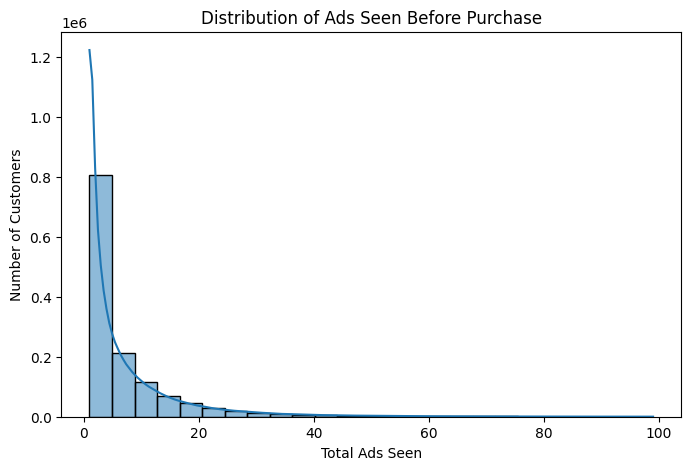

In [107]:
plt.figure(figsize=(8, 5))
sns.histplot(clean_agg[clean_agg['total_website_interaction']<100]['total_website_interaction'], bins=25, kde=True)
plt.xlabel("Total Ads Seen")
plt.ylabel("Number of Customers")
plt.title("Distribution of Ads Seen Before Purchase")
plt.show()

In [119]:
clean_agg['total_ads_cost'].mean()

3426.0052824221193

In [117]:
client_to_remove = clean_agg[
    (clean_agg['Order'] == 0) &
    (clean_agg['total_website_interaction'] > (clean_agg['total_website_interaction'].mean())) &
    ((clean_agg['total_ads_programmatic_seen'] > (clean_agg['total_ads_programmatic_seen'].mean())) |
    (clean_agg['TV_ads'] > (clean_agg['TV_ads'].mean())))
    ]

(client_to_remove['total_cost_TV_ads'].sum() + client_to_remove['total_ads_cost'].sum())/100000

1098.5656439400002

In [ ]:
client_to_remove[client_to_remove['']]

In [130]:
len(clean_agg[clean_agg['Order']>=1])

502025

In [141]:
client_to_remove2 = clean_agg[
    (clean_agg['Order'] == 0) &
    (clean_agg['total_website_interaction']<10) &
    (clean_agg['total_ads_cost'] >= (clean_agg['total_ads_cost'].median())) &
    (clean_agg['total_cost_TV_ads'] >= (clean_agg['total_cost_TV_ads'].median()))
    ]

(client_to_remove2['total_cost_TV_ads'].sum() + client_to_remove2['total_ads_cost'].sum())/100000

14344.648248910004

In [132]:
len(client_to_remove2['customer_id'].to_list())

220806

In [142]:
client_rem_list = client_to_remove2['customer_id'].to_list()

In [137]:
client_to_promote = clean_agg[
    (clean_agg['Order'] == 0) &
    (clean_agg['total_website_interaction']>=10) &
    (clean_agg['total_ads_cost'] <= (clean_agg['total_ads_cost'].mean())) &
    (clean_agg['total_cost_TV_ads'] <= (clean_agg['total_cost_TV_ads'].mean()))
    ]

(client_to_promote['total_cost_TV_ads'].sum() + client_to_promote['total_ads_cost'].sum())/100000

253.17222347999999

In [ ]:
len(client_to_promote['customer_id'].to_list())

14427

In [143]:
client_keep_list = client_to_promote['customer_id'].to_list()

In [144]:
chrono_remove = chrono_detail[chrono_detail['customer_id'].isin(client_rem_list)]

In [153]:
chrono_remove.groupby('kind')[['chrono_float', 'ads_before_website', 'avg_time_between_ads']].mean().reset_index().iloc[1]

kind                     website
chrono_float             11.0281
ads_before_website      1.716303
avg_time_between_ads    6.198631
Name: 1, dtype: object

In [149]:
chrono_promote = chrono_detail[chrono_detail['customer_id'].isin(client_keep_list)]

In [156]:
chrono_promote.groupby('kind')[['chrono_float', 'ads_before_website', 'avg_time_between_ads']].mean().reset_index().iloc[1]

kind                     website
chrono_float            1.120215
ads_before_website      0.081611
avg_time_between_ads     6.02359
Name: 1, dtype: object

In [159]:
chrono_promote[chrono_promote['customer_id']=='reghKg33b8iM50kBxu']

,Unnamed: 0.1,Unnamed: 0,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,kind,...,device_type,cost_milli_cent,chrono,chrono_float,date,time,ads_before_website,avg_time_between_ads,hours,month
9191985,9191985,10203923,reghKg33b8iM50kBxu,2024-01-02 22:36:22,NaN,NaN,NaN,NaN,NaN,ads,...,PC,1705.000,0 days 00:00:00,0.00000,2024-01-02,22:36:22,0,NaN,22,1
9191986,9191986,1979222,reghKg33b8iM50kBxu,2024-01-02 22:39:58,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,...,NaN,NaN,0 days 00:03:36,0.00250,2024-01-02,22:39:58,1,NaN,22,1
9191987,9191987,10203922,reghKg33b8iM50kBxu,2024-01-02 22:46:44,NaN,NaN,NaN,NaN,NaN,ads,...,PC,696.877,0 days 00:00:00,0.00000,2024-01-02,22:46:44,0,NaN,22,1
9191988,9191988,1979220,reghKg33b8iM50kBxu,2024-06-28 14:00:49,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Ckn 30lb bg,NaN,NaN,website,...,NaN,NaN,177 days 15:14:05,177.63478,2024-06-28,14:00:49,1,NaN,14,6
9191989,9191989,1979224,reghKg33b8iM50kBxu,2024-06-28 14:03:13,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,...,NaN,NaN,NaN,0.00000,2024-06-28,14:03:13,0,NaN,14,6
9191990,9191990,1979223,reghKg33b8iM50kBxu,2024-06-28 14:21:31,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,...,NaN,NaN,NaN,0.00000,2024-06-28,14:21:31,0,NaN,14,6
9191991,9191991,1979217,reghKg33b8iM50kBxu,2024-06-28 14:36:52,Product Page View,Science Diet,SD Ca Adt PftDig CknVegRStw 12x12.8oz cs,NaN,NaN,website,...,NaN,NaN,NaN,0.00000,2024-06-28,14:36:52,0,NaN,14,6
9191992,9191992,1979221,reghKg33b8iM50kBxu,2024-06-28 14:48:23,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Ckn 4lb bg,NaN,NaN,website,...,NaN,NaN,NaN,0.00000,2024-06-28,14:48:23,0,NaN,14,6
9191993,9191993,1979225,reghKg33b8iM50kBxu,2024-06-28 14:51:32,Add to cart,Science Diet,SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg,NaN,NaN,website,...,NaN,NaN,NaN,0.00000,2024-06-28,14:51:32,0,NaN,14,6
9191994,9191994,1979219,reghKg33b8iM50kBxu,2024-06-28 14:53:41,Product Page View,Science Diet,SD Ca Adt SenSt&Sk Ckn 15.5lb bg,NaN,NaN,website,...,NaN,NaN,NaN,0.00000,2024-06-28,14:53:41,0,NaN,14,6


### Customer a seduire et a stopper de target:

In [85]:
df_retail['ordered_at_least_once'] = df_retail.groupby('customer_id')['event_name'].transform(lambda x: 'Order' in x.values)

In [89]:
retail_sum = df_retail.groupby('customer_id').agg({
    'event_name' : 'count',
    'sales' : 'sum',
    'quantity' :'sum',
    'ordered_at_least_once': 'max'
}).reset_index()
retail_sum = retail_sum[retail_sum['customer_id']!= 'unknown']

In [88]:
map = pd.read_csv('/Users/victor/code/escp/hackaton/data/mapping_transac_publisher_tv.csv')

In [91]:
map = map[map['customer_id'].isin(retail_sum['customer_id'].to_list())]

In [93]:
clean_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1354583 non-null  object 
 1   Add to cart                1354583 non-null  float64
 2   Order                      1354583 non-null  float64
 3   Product Page View          1354583 non-null  float64
 4   product_name               1330504 non-null  object 
 5   first_web_visit_timestamp  1354583 non-null  object 
 6   sales                      1354583 non-null  float64
 7   brand                      1330504 non-null  object 
 8   quantity                   1354583 non-null  float64
 9   total_website_interaction  1354583 non-null  float64
 10  breed                      1354583 non-null  object 
 11  age                        1354583 non-null  object 
 12  income                     1354583 non-null  object 
 13  Contextual  